# Load data

In [11]:
import numpy as np
from scipy import stats
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns

In [12]:
adata = sc.read("/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_hvg_clust.h5ad")


In [13]:
adata

AnnData object with n_obs × n_vars = 6235 × 1992
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [14]:
#adata.uns['log1p']

In [15]:
if 'log1p' not in adata.uns.keys():
    adata.uns['log1p'] = {}
adata.uns['log1p']['base'] = np.e

# Create dictionary ensembl2symbol

In [ ]:
for line in response.iter_lines():
    decoded_line = line.decode('utf-8').strip()  # Remove any extra spaces or newlines
    
    if not decoded_line or '\t' not in decoded_line:
        continue  # Skip empty or incorrectly formatted lines
    
    try:
        ensembl_id, gene_name = decoded_line.split('\t')
        ensembl_to_gene_name[ensembl_id] = gene_name
    except ValueError:
        print(f"Skipping malformed line: {decoded_line}")


In [19]:
from biomart import BiomartServer

# Connect to the BioMart server
server = BiomartServer("http://ensembl.org/biomart")

# Select the human genes dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Query BioMart to get the translation from Ensembl ID to gene symbol
response = dataset.search({
    'attributes': ['ensembl_gene_id', 'external_gene_name'],
})

# Initialize an empty dictionary to store the mapping
ensembl_to_gene_name = {}

# Iterate through the response lines
for line in response.iter_lines():
    # Decode the line and split it into Ensembl ID and gene name
    decoded_line = line.decode('utf-8')
    ensembl_id,gene_name = decoded_line.split('\t')
    
    # Store the mapping in the dictionary
    ensembl_to_gene_name[ensembl_id] = gene_name

# Now, ensembl_to_gene_name is a dictionary with Ensembl IDs as keys and gene names as values.


In [21]:
ensembl_to_gene_name

{'ENSG00000210049': 'MT-TF',
 'ENSG00000211459': 'MT-RNR1',
 'ENSG00000210077': 'MT-TV',
 'ENSG00000210082': 'MT-RNR2',
 'ENSG00000209082': 'MT-TL1',
 'ENSG00000198888': 'MT-ND1',
 'ENSG00000210100': 'MT-TI',
 'ENSG00000210107': 'MT-TQ',
 'ENSG00000210112': 'MT-TM',
 'ENSG00000198763': 'MT-ND2',
 'ENSG00000210117': 'MT-TW',
 'ENSG00000210127': 'MT-TA',
 'ENSG00000210135': 'MT-TN',
 'ENSG00000210140': 'MT-TC',
 'ENSG00000210144': 'MT-TY',
 'ENSG00000198804': 'MT-CO1',
 'ENSG00000210151': 'MT-TS1',
 'ENSG00000210154': 'MT-TD',
 'ENSG00000198712': 'MT-CO2',
 'ENSG00000210156': 'MT-TK',
 'ENSG00000228253': 'MT-ATP8',
 'ENSG00000198899': 'MT-ATP6',
 'ENSG00000198938': 'MT-CO3',
 'ENSG00000210164': 'MT-TG',
 'ENSG00000198840': 'MT-ND3',
 'ENSG00000210174': 'MT-TR',
 'ENSG00000212907': 'MT-ND4L',
 'ENSG00000198886': 'MT-ND4',
 'ENSG00000210176': 'MT-TH',
 'ENSG00000210184': 'MT-TS2',
 'ENSG00000210191': 'MT-TL2',
 'ENSG00000198786': 'MT-ND5',
 'ENSG00000198695': 'MT-ND6',
 'ENSG00000210194': 

# Test Data distributions

In [22]:
# Step 1: Generate or input your data (replace with your data)
data = np.random.lognormal(mean=0, sigma=1, size=1000)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(1000,)


In [23]:
first_column = adata.X[:, 0]
data = first_column.toarray()
print(type(data))
print(data.shape)
data = data[np.isfinite(data)]

<class 'numpy.ndarray'>
(6235, 1)


In [24]:
if len(data.shape) > 1 and data.shape[1] == 1:  # if it's a column vector
    data = data.ravel()

In [25]:
print(data.shape)

(6235,)


In [26]:
unique_values = np.unique([int(x) for x in adata.obs['leiden'].values])
print(unique_values)

[0 1 2 3]


In [27]:
#leidens = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' 10', '13', '14', '15', '16']
leidens = unique_values

In [28]:
print(adata.obs['condition'])

barcode
AAACCCAGTAGGCTCC-1         CTRL_1
AAACCCAGTCGCAACC-1         CTRL_1
AAACCCATCCACAAGT-1         CTRL_1
AAACGCTTCACTACGA-1         CTRL_1
AAAGAACAGATACAGT-1         CTRL_1
                         ...     
TTTACTGTCATTACTC-1    TGFb1_GEM_2
TTTCACAGTGATATAG-1    TGFb1_GEM_2
TTTCACATCGATGCAT-1    TGFb1_GEM_2
TTTCATGTCCCTCTAG-1    TGFb1_GEM_2
TTTGACTGTTCCGGTG-1    TGFb1_GEM_2
Name: condition, Length: 6235, dtype: category
Categories (7, object): ['CTRL_1', 'CTRL_2', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


In [29]:
adata.obs['condition'].cat.categories


Index(['CTRL_1', 'CTRL_2', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1',
       'TGFb1_GEM_2'],
      dtype='object')

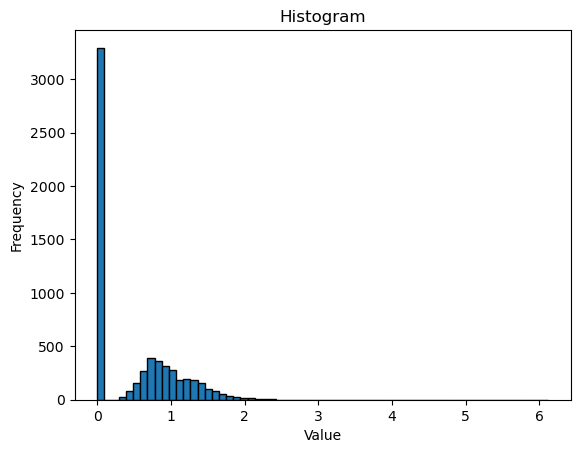

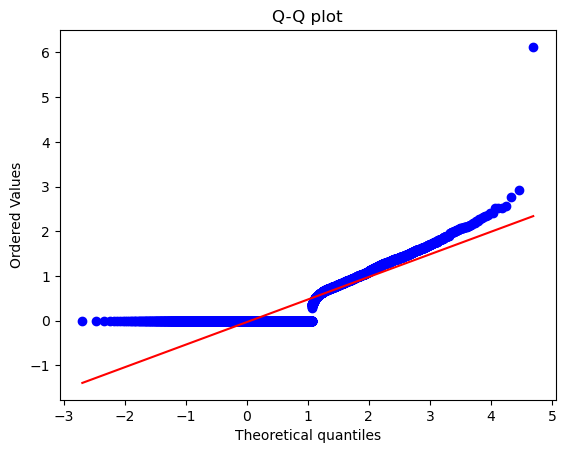

K-S statistic: 0.369813070046089
P-value: 0.0
Reject the null hypothesis, the data does not follow a lognormal distribution.


In [30]:
# Step 2: Visual Inspection using a histogram
plt.hist(data, bins='auto', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Step 3: Q-Q plot
stats.probplot(data, dist='norm', sparams=(1,), plot=plt)
plt.title('Q-Q plot')
plt.show()

# Step 4: Statistical test (Kolmogorov-Smirnov test)
# Here, we use the lognormal distribution as the comparison distribution
D, p_value = stats.kstest(data, 'norm', args=(1,))
print(f'K-S statistic: {D}')
print(f'P-value: {p_value}')

# Interpretation
if p_value > 0.05:
    print('Fail to reject the null hypothesis, the data follows a lognormal distribution.')
else:
    print('Reject the null hypothesis, the data does not follow a lognormal distribution.')

In [31]:
import powerlaw

# Fit the data to a power-law distribution
fit = powerlaw.Fit(data)

# Print out the alpha parameter (scaling exponent) of the power-law fit
print(fit.power_law.alpha)

# Compare the power-law fit to an exponential fit, for instance
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

print(R, p)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
7.702378285758816%
0.5410210918396946 0.5884930449623651


# Differential expression analysis all


## Prepare compare all condition 

In [32]:
# Specify the groups you want to compare
categories_list = list(adata.obs['condition'].cat.categories)
print(categories_list)

#conditions = ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']
conditions = categories_list


['CTRL_1', 'CTRL_2', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


## Prepare compare all clusters

In [33]:
print(adata.obs['leiden'])


barcode
AAACCCAGTAGGCTCC-1    0
AAACCCAGTCGCAACC-1    0
AAACCCATCCACAAGT-1    0
AAACGCTTCACTACGA-1    0
AAAGAACAGATACAGT-1    0
                     ..
TTTACTGTCATTACTC-1    0
TTTCACAGTGATATAG-1    2
TTTCACATCGATGCAT-1    2
TTTCATGTCCCTCTAG-1    1
TTTGACTGTTCCGGTG-1    2
Name: leiden, Length: 6235, dtype: category
Categories (4, object): ['0', '1', '2', '3']


## Translations

### example translations

In [34]:
#adata.var['gene_symbol'] = [ensembl_to_gene_name.get(gene_id, 'NA') for gene_id in adata.var_names]

In [35]:
#adata.var_names = [ensembl_to_gene_name.get(gene_id, gene_id) for gene_id in adata.var_names]

## Get information of your single cell object

In [36]:
print(adata)

AnnData object with n_obs × n_vars = 6235 × 1992
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


### Get information about how the counts are store
### Log transformed?
### Sometimes the base of the logtransformation is not stored properly. this information can be added afterwards. 

In [37]:
if 'log1p' in adata.uns and 'base' not in adata.uns['log1p']:
    adata.uns['log1p']['base'] = np.e  # Assuming natural logarithm was used. Change accordingly if it was a different base.

## Comparison of all vs. all

In [38]:
comparisons = []
for i in range(len(conditions)):
    for j in range(i+1, len(conditions)):
        comparisons.append((conditions[i], conditions[j]))

In [39]:
import scanpy as sc

for group1, group2 in comparisons:
    # Subset the data for only the two groups you're comparing
    subset = adata[adata.obs['condition'].isin([group1, group2])]
    
    # Mark these two conditions in the subset
    subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
    
    # Differential expression analysis
    sc.tl.rank_genes_groups(subset, 'group_comparison', method='wilcoxon')
    
    # You can then retrieve and store/save the results for this comparison
    # For instance:
    result = subset.uns['rank_genes_groups']
    # Store or further process the result

/tmp/ipykernel_1273922/2868860013.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
/tmp/ipykernel_1273922/2868860013.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
/tmp/ipykernel_1273922/2868860013.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
/tmp/ipykernel_1273922/2868860013.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
/tmp/ipykernel_1273922/2868860013.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset.ob

## Comparison contions vs. all other conditions

In [40]:
import scanpy as sc
import pandas as pd

# Initialize an empty dataframe to store results
results_df = pd.DataFrame()

# Example conditions
# conditions = ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']
# Example dictionary mapping Ensembl IDs to gene names
# ensembl_to_gene_name = {...}  

for condition in conditions:
    # Create a new column for grouping: the condition vs. all others
    adata.obs['grouping'] = ['target' if x == condition else 'others' for x in adata.obs['condition']]
    
    # Perform differential expression
    sc.tl.rank_genes_groups(adata, 'grouping', method='wilcoxon', n_genes=adata.shape[1])
    
    # Convert result to dataframe
    result = pd.DataFrame({
        'ID': adata.uns['rank_genes_groups']['names']['target'],
        'log2FC': adata.uns['rank_genes_groups']['logfoldchanges']['target'],
        'p.value': adata.uns['rank_genes_groups']['pvals']['target'],
        'adjusted.p.value': adata.uns['rank_genes_groups']['pvals_adj']['target']
    })

    # Calculate basemean expression for genes present in adata.var_names
    result['basemean'] = [
        (adata[:, gene].X.sum() / adata.shape[0]) if gene in adata.var_names else 'NA' 
        for gene in result['ID']
    ]

    # Convert ensembl IDs to gene symbols
    result['symbol'] = result['ID'].map(ensembl_to_gene_name).fillna(result['ID'])

    # Assign comparison name
    result['comparison'] = condition + "_vs_others"

    # Append result to the main dataframe
    results_df = pd.concat([results_df, result])

In [41]:
results_df.head(20)

ID    log2FC        p.value  adjusted.p.value  basemean  \
0   ENSG00000111057  2.625903   0.000000e+00      0.000000e+00  1.460369   
1   ENSG00000196352  2.421552   0.000000e+00      0.000000e+00  1.122333   
2   ENSG00000231500  0.615929   0.000000e+00      0.000000e+00  4.914664   
3   ENSG00000152056  2.487313  1.259411e-303     1.090759e-301  0.611994   
4   ENSG00000170421  1.630459  9.270552e-274     5.957077e-272  1.153499   
5   ENSG00000171345  1.808189  4.848933e-259     3.018461e-257  1.537796   
6   ENSG00000142089  1.265976  1.102419e-234     4.880039e-233  1.839973   
7   ENSG00000087086  0.813461  1.857131e-216     6.980008e-215  3.887271   
8   ENSG00000170345  1.644257  4.364287e-216     1.609937e-214  1.339585   
9   ENSG00000167641  1.269951  4.416155e-211     1.570890e-209  2.073719   
10  ENSG00000107984  2.277470  1.164638e-195     3.932133e-194  0.629708   
11  ENSG00000148671  2.215353  8.174229e-192     2.626301e-190  0.638698   
12  ENSG00000253368  1.850706  5.012589e-174     1.406349e-172  0.542030   
13  ENSG00000013588  1.617576  1.228295e-168     3.351730e-167  0.735772   
14  ENSG00000130066  1.197873  2.968409e-160     7.679311e-159  1.528289   
15  ENSG00000167779  1.955287  2.241907e-158     5.725485e-157  0.508194   
16  ENSG00000147872  1.775447  5.104861e-150     1.182428e-148  0.702492   
17  ENSG00000143320  1.350628  2.693994e-145     6.098224e-144  0.753762   
18  ENSG00000135046  1.710828  1.345828e-143     2.946033e-142  0.519951   
19  ENSG00000137962  1.189039  7.258966e-136     1.460592e-134  1.015146   

      symbol        comparison  
0      KRT18  CTRL_1_vs_others  
1       CD55  CTRL_1_vs_others  
2      RPS18  CTRL_1_vs_others  
3      AP1S3  CTRL_1_vs_others  
4       KRT8  CTRL_1_vs_others  
5      KRT19  CTRL_1_vs_others  
6     IFITM3  CTRL_1_vs_others  
7        FTL  CTRL_1_vs_others  
8        FOS  CTRL_1_vs_others  
9   PPP1R14A  CTRL_1_vs_others  
10      DKK1  CTRL_1_vs_others  
11     ADIRF  CTRL_1_vs_others  
12     TRNP1  CTRL_1_vs_others  
13    GPRC5A  CTRL_1_vs_others  
14      SAT1  CTRL_1_vs_others  
15    IGFBP6  CTRL_1_vs_others  
16     PLIN2  CTRL_1_vs_others  
17    CRABP2  CTRL_1_vs_others  
18     ANXA1  CTRL_1_vs_others  
19  ARHGAP29  CTRL_1_vs_others

In [42]:
# Reorder columns
results_df = results_df[['comparison', 'ID', 'symbol', 'basemean', 'log2FC', 'p.value', 'adjusted.p.value']]


In [43]:
# write to file location
results_df.to_csv("/storage/users/data/PANC/diff_anaylsis_conditions_results_df.csv", index=False)

## Visualize the results

In [44]:
import pandas as pd
results_df = pd.read_csv("/storage/users/data/PANC/diff_anaylsis_conditions_results_df.csv")

In [45]:
adata

AnnData object with n_obs × n_vars = 6235 × 1992
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden', 'grouping'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [46]:
sorted_unique_comparisons = sorted(results_df['comparison'].unique())
print(sorted_unique_comparisons)

['CTRL_1_vs_others', 'CTRL_2_vs_others', 'GEM_2_vs_others', 'TGFb1_1_vs_others', 'TGFb1_2_vs_others', 'TGFb1_GEM_1_vs_others', 'TGFb1_GEM_2_vs_others']


## Visualize Top Genes for the comparions conditions vs all other

['CTRL_1_vs_others', 'CTRL_2_vs_others', 'GEM_2_vs_others', 'TGFb1_1_vs_others', 'TGFb1_2_vs_others', 'TGFb1_GEM_1_vs_others', 'TGFb1_GEM_2_vs_others']


/tmp/ipykernel_1273922/383463395.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genes, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
/tmp/ipykernel_1273922/383463395.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genes, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
/tmp/ipykernel_1273922/383463395.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genes, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
/tmp/ipykernel_1273922/383463395.py:35: 

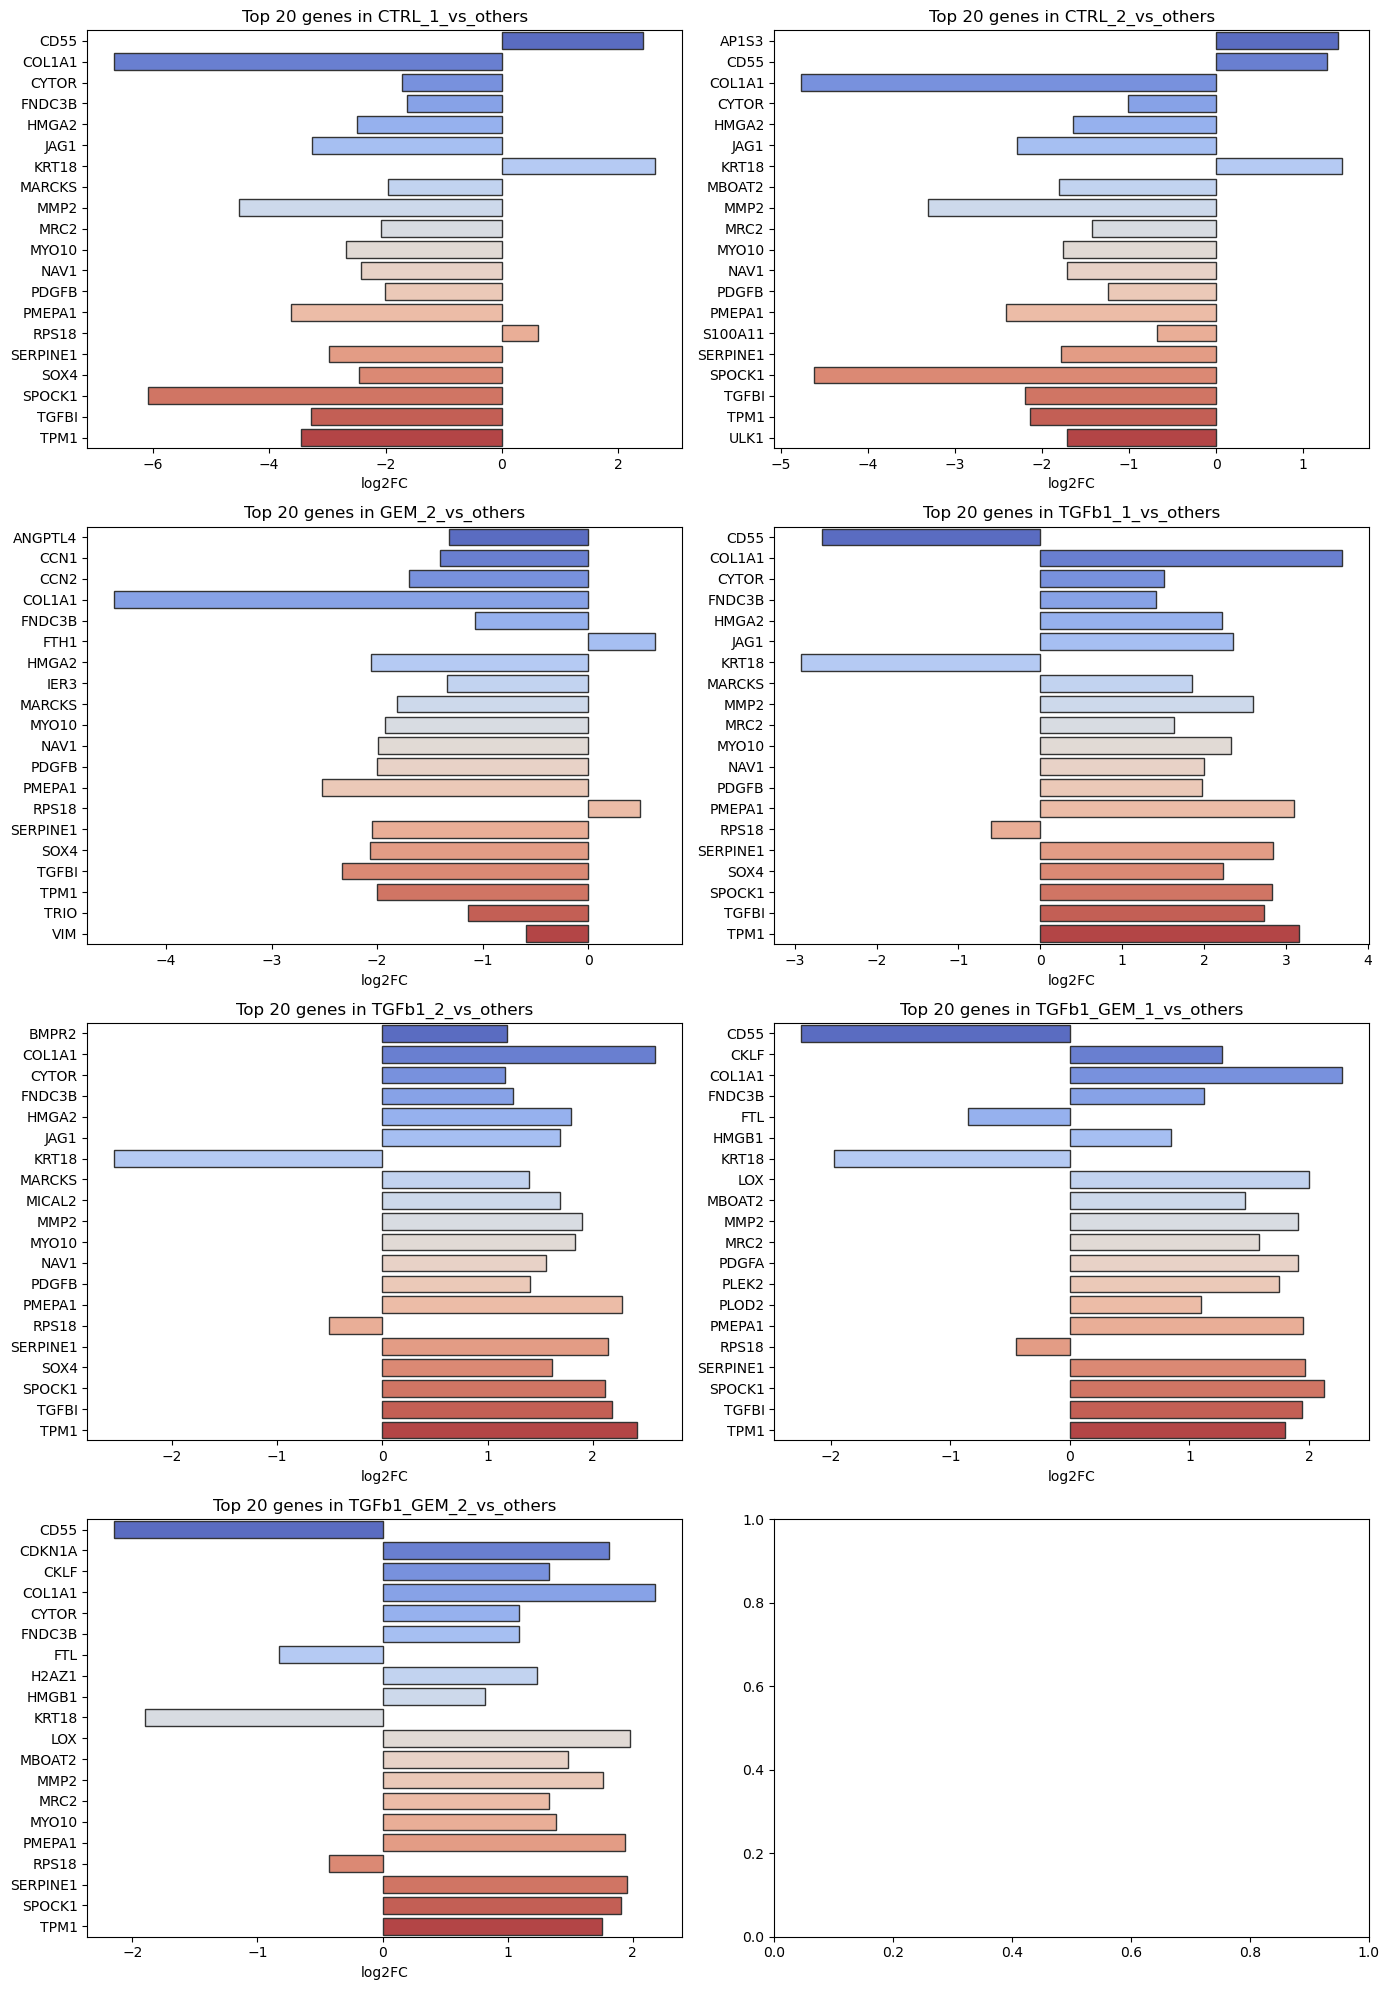

In [47]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your dataframe as results_df
sorted_unique_comparisons = sorted(results_df['comparison'].unique())
print(sorted_unique_comparisons)

# Initialize the 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust space between plots

for index, comparison in enumerate(sorted_unique_comparisons):

    # Extract results for a specific comparison
    specific_comparison = comparison  # example
    filtered_results = results_df[results_df['comparison'] == specific_comparison]
    
    # Visualize the top genes
    # Sort by adjusted p-value and pick tops n genes
    n_top_genes = 20  # for instance
    #top_genes = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(n_top_genes)
    #print(top_genes)
    # Get top 20 genes by adjusted.p.value
    top_by_pvalue = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(n_top_genes)
    
    # Now, sort those top 20 genes by symbol
    top_genes = top_by_pvalue.sort_values(by="symbol", ascending=True)

    
    
    # Generate a bar plot in the appropriate subplot
    ax = axes[index // 2, index % 2]  # Determine the row and column for subplot
    sns.barplot(data=top_genes, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
    ax.set_title(f"Top {n_top_genes} genes in {comparison}")
    ax.set_xlabel('log2FC')  # Set x-axis label
    ax.set_ylabel('')  # Clear y-axis label for brevity

plt.tight_layout()
plt.show()

['CTRL_1_vs_others', 'CTRL_2_vs_others', 'GEM_2_vs_others', 'TGFb1_1_vs_others', 'TGFb1_2_vs_others', 'TGFb1_GEM_1_vs_others', 'TGFb1_GEM_2_vs_others']


/tmp/ipykernel_1273922/1458118482.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genes, x="log2FC", y="symbol", palette=log2FC_colors, edgecolor=".2", ax=ax)
/tmp/ipykernel_1273922/1458118482.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=top_genes, x="log2FC", y="symbol", palette=log2FC_colors, edgecolor=".2", ax=ax)
/tmp/ipykernel_1273922/1458118482.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genes, x="log2FC", y="symbol", palette=log2FC_colors, edgecolor=".2", ax=ax)
/tmp/ipykernel_1273922/1458118482.py:33: UserWarning: Numpy array is not 

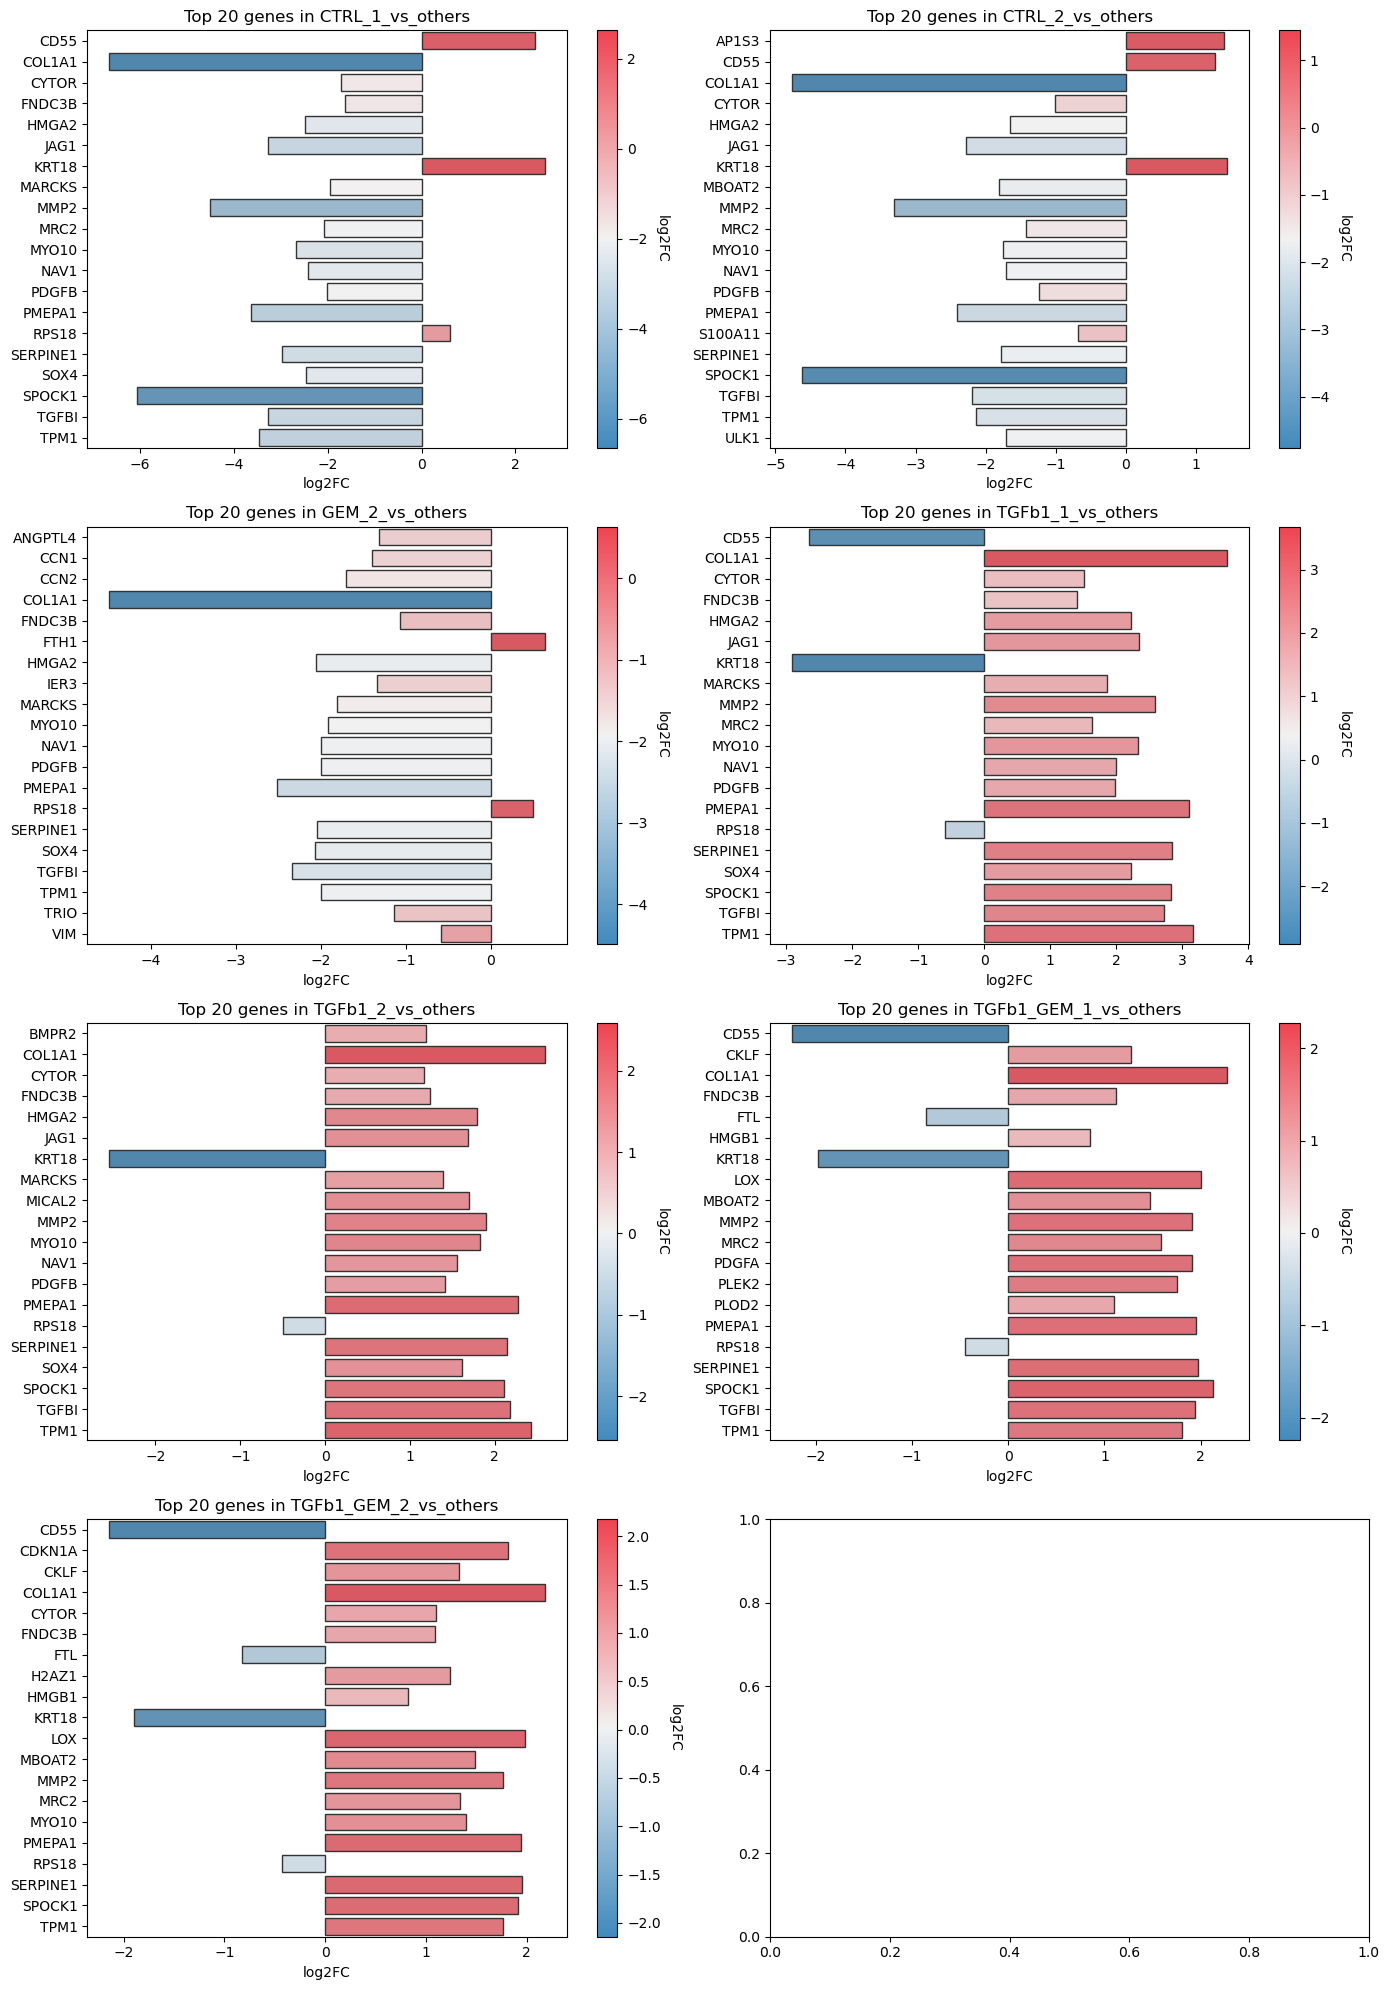

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your dataframe as results_df
sorted_unique_comparisons = sorted(results_df['comparison'].unique())
print(sorted_unique_comparisons)

# Initialize the 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust space between plots

for index, comparison in enumerate(sorted_unique_comparisons):

    # Extract results for a specific comparison
    specific_comparison = comparison  # example
    filtered_results = results_df[results_df['comparison'] == specific_comparison]
    
    # Get top 20 genes by adjusted.p.value
    n_top_genes = 20  # for instance
    top_by_pvalue = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(n_top_genes)
    
    # Now, sort those top 20 genes by symbol
    top_genes = top_by_pvalue.sort_values(by="symbol", ascending=True)

    # Generate a color mapping for log2FC
    cmap = sns.diverging_palette(240, 10, s=80, l=55, as_cmap=True)  # Blue to white to red
    norm_log2FC = plt.Normalize(top_genes["log2FC"].min(), top_genes["log2FC"].max())
    log2FC_colors = cmap(norm_log2FC(top_genes["log2FC"].values))
    
    # Generate a bar plot in the appropriate subplot
    ax = axes[index // 2, index % 2]  # Determine the row and column for subplot
    sns.barplot(data=top_genes, x="log2FC", y="symbol", palette=log2FC_colors, edgecolor=".2", ax=ax)
    ax.set_title(f"Top {n_top_genes} genes in {comparison}")
    ax.set_xlabel('log2FC')  # Set x-axis label
    ax.set_ylabel('')  # Clear y-axis label for brevity
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_log2FC)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("log2FC", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


In [49]:
import os
# Save the figure
fig.savefig('figures/comparisons_plot.png', bbox_inches='tight')

## Visualize shared Top Gene between conditions (not working)

/tmp/ipykernel_1273922/1092586222.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genes_data, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
/tmp/ipykernel_1273922/1092586222.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genes_data, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
/tmp/ipykernel_1273922/1092586222.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genes_data, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
/tmp/ipykernel_1273922

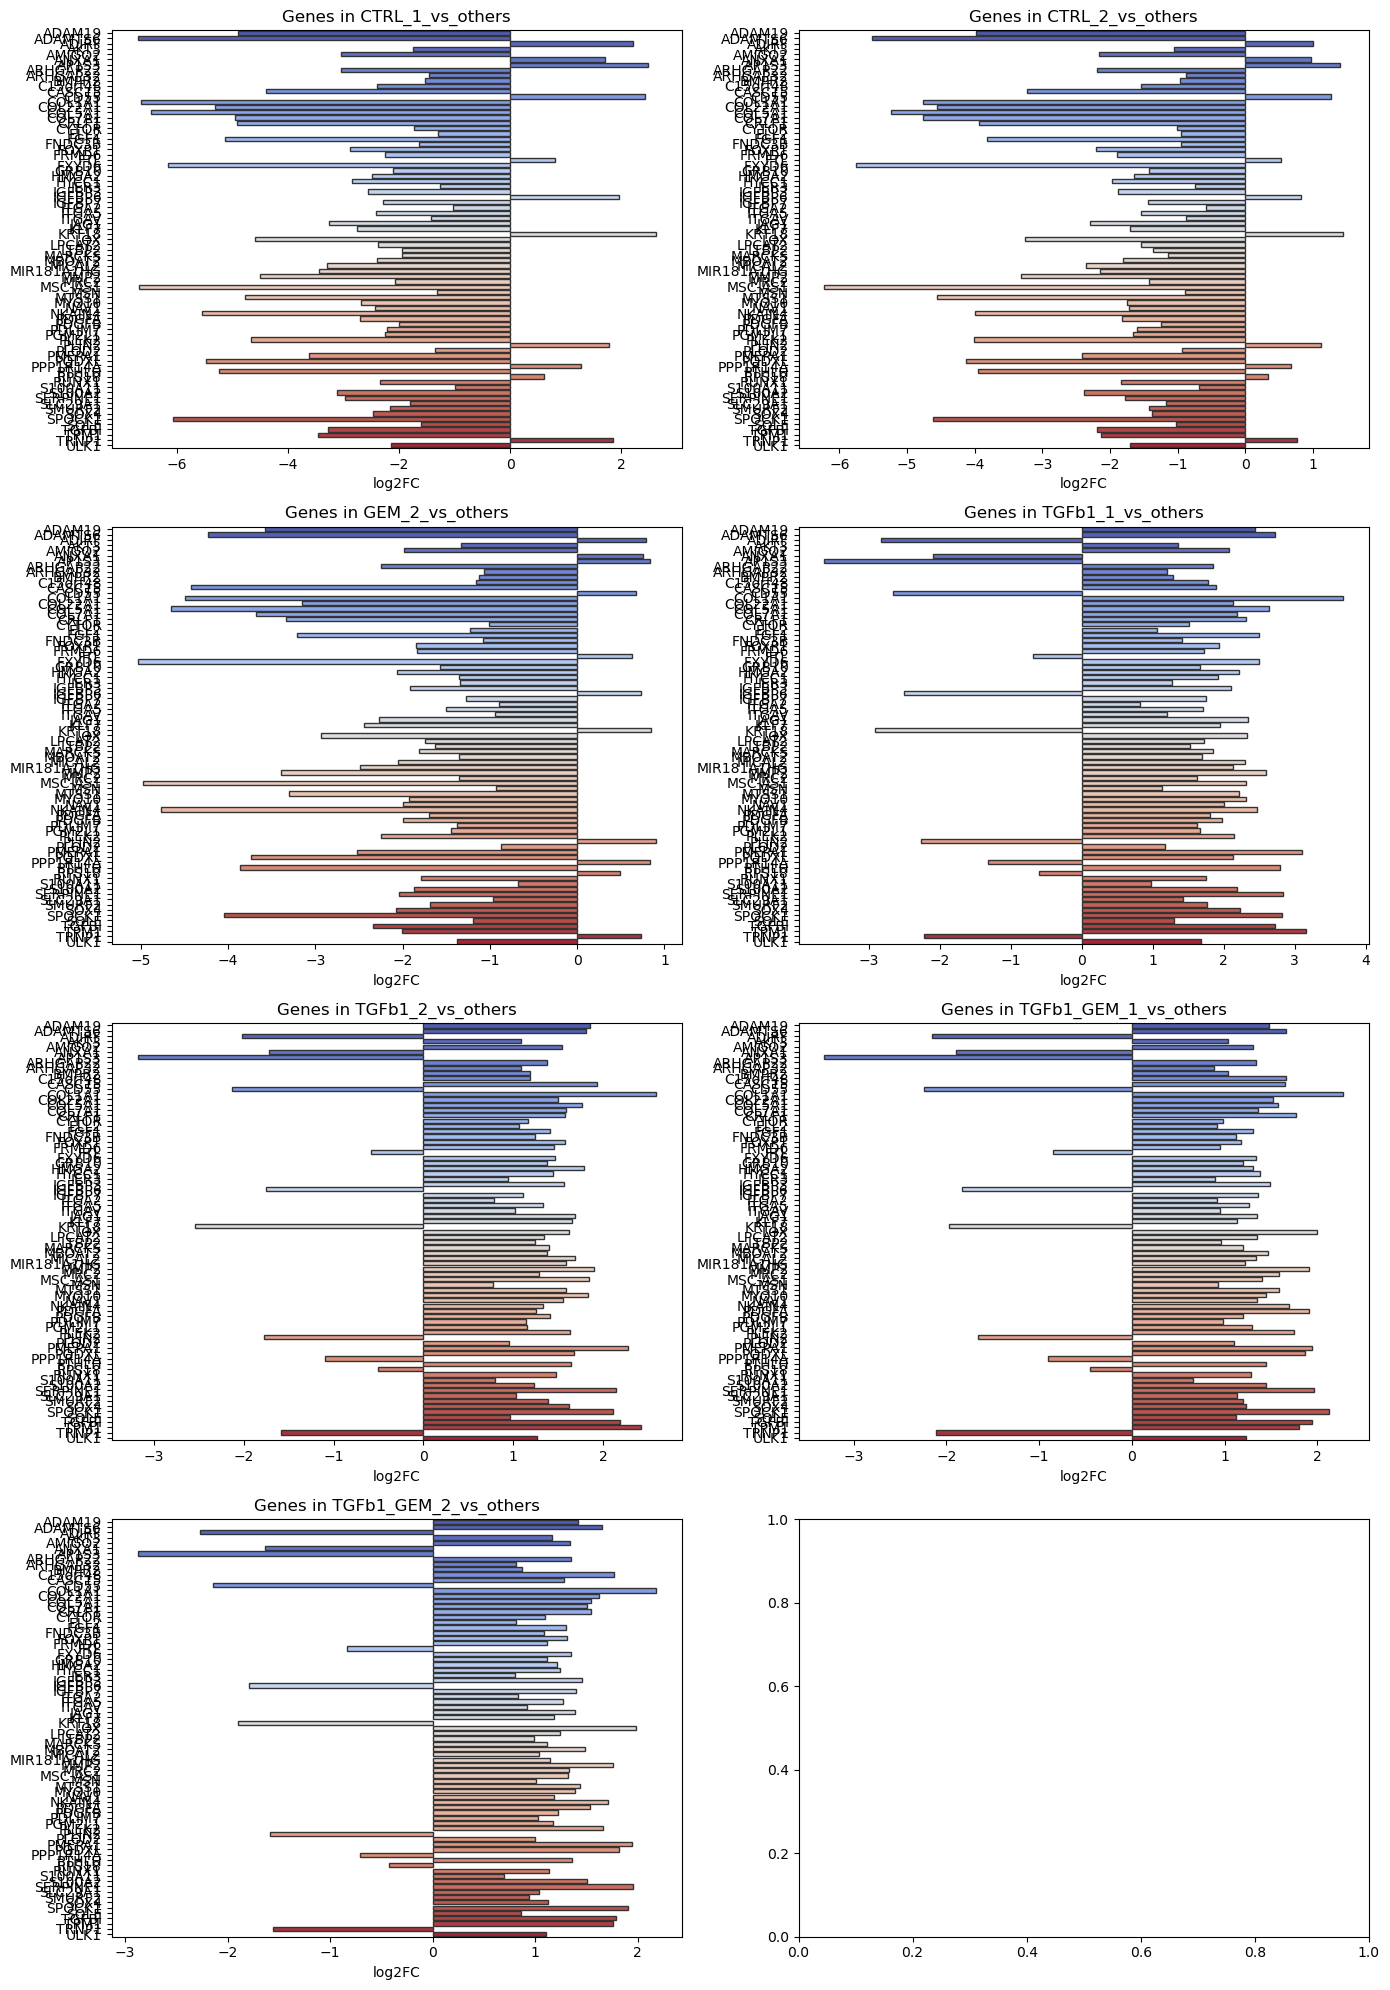

In [50]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your dataframe as results_df
sorted_unique_comparisons = sorted(results_df['comparison'].unique())

# Extract top 30 genes from each condition
top_genes_per_comparison = {}
for comparison in sorted_unique_comparisons:
    filtered_results = results_df[results_df['comparison'] == comparison]
    top_genes = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(160)['symbol'].tolist()
    top_genes_per_comparison[comparison] = set(top_genes)

# Intersect top genes across all conditions
intersected_genes = set.intersection(*top_genes_per_comparison.values())
intersected_genes_sorted = sorted(list(intersected_genes))

# Initialize the 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=1)  # Adjust space between plots

for index, comparison in enumerate(sorted_unique_comparisons):

    # Extract results for a specific comparison
    specific_comparison = comparison  # example
    filtered_results = results_df[results_df['comparison'] == specific_comparison]
    
    # Filter the results to only show the intersected and sorted genes
    top_genes_data = filtered_results[filtered_results['symbol'].isin(intersected_genes_sorted)]
    
    # Sort the results according to the order in intersected_genes_sorted
    top_genes_data = top_genes_data.set_index('symbol').loc[intersected_genes_sorted].reset_index()
    
    # Generate a bar plot in the appropriate subplot
    ax = axes[index // 2, index % 2]  # Determine the row and column for subplot
    sns.barplot(data=top_genes_data, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
    ax.set_title(f"Genes in {comparison}")
    ax.set_xlabel('log2FC')  # Set x-axis label
    ax.set_ylabel('')  # Clear y-axis label for brevity
    

plt.tight_layout()
plt.show()

In [51]:
top_genes_data

symbol             comparison               ID  basemean    log2FC  \
0    ADAM19  TGFb1_GEM_2_vs_others  ENSG00000135074  0.453088  1.419410   
1   ADAMTS6  TGFb1_GEM_2_vs_others  ENSG00000049192  0.527704  1.649156   
2     ADIRF  TGFb1_GEM_2_vs_others  ENSG00000148671  0.638698 -2.270972   
3      AKT3  TGFb1_GEM_2_vs_others  ENSG00000117020  0.763579  1.164480   
4    AMIGO2  TGFb1_GEM_2_vs_others  ENSG00000139211  0.603684  1.343533   
..      ...                    ...              ...       ...       ...   
74     SQLE  TGFb1_GEM_2_vs_others  ENSG00000104549  0.718867  0.864549   
75    TGFBI  TGFb1_GEM_2_vs_others  ENSG00000120708  1.569145  1.786450   
76     TPM1  TGFb1_GEM_2_vs_others  ENSG00000140416  2.102351  1.758954   
77    TRNP1  TGFb1_GEM_2_vs_others  ENSG00000253368  0.542030 -1.552492   
78     ULK1  TGFb1_GEM_2_vs_others  ENSG00000177169  0.729462  1.101131   

         p.value  adjusted.p.value  
0   7.579040e-32      2.435072e-30  
1   2.254193e-29      6.236599e-28  
2   1.887763e-26      4.642499e-25  
3   2.158165e-34      9.770602e-33  
4   3.961560e-35      1.878912e-33  
..           ...               ...  
74  3.211420e-16      3.998218e-15  
75  1.226550e-44      1.163470e-42  
76  1.016361e-47      1.557378e-45  
77  1.192558e-19      1.963286e-18  
78  3.005437e-30      9.070957e-29  

[79 rows x 7 columns]

## Volcanos

In [52]:
#!pip install adjustText

/home/s468630/micromamba/envs/scAnalysis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/s468630/micromamba/envs/scAnalysis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


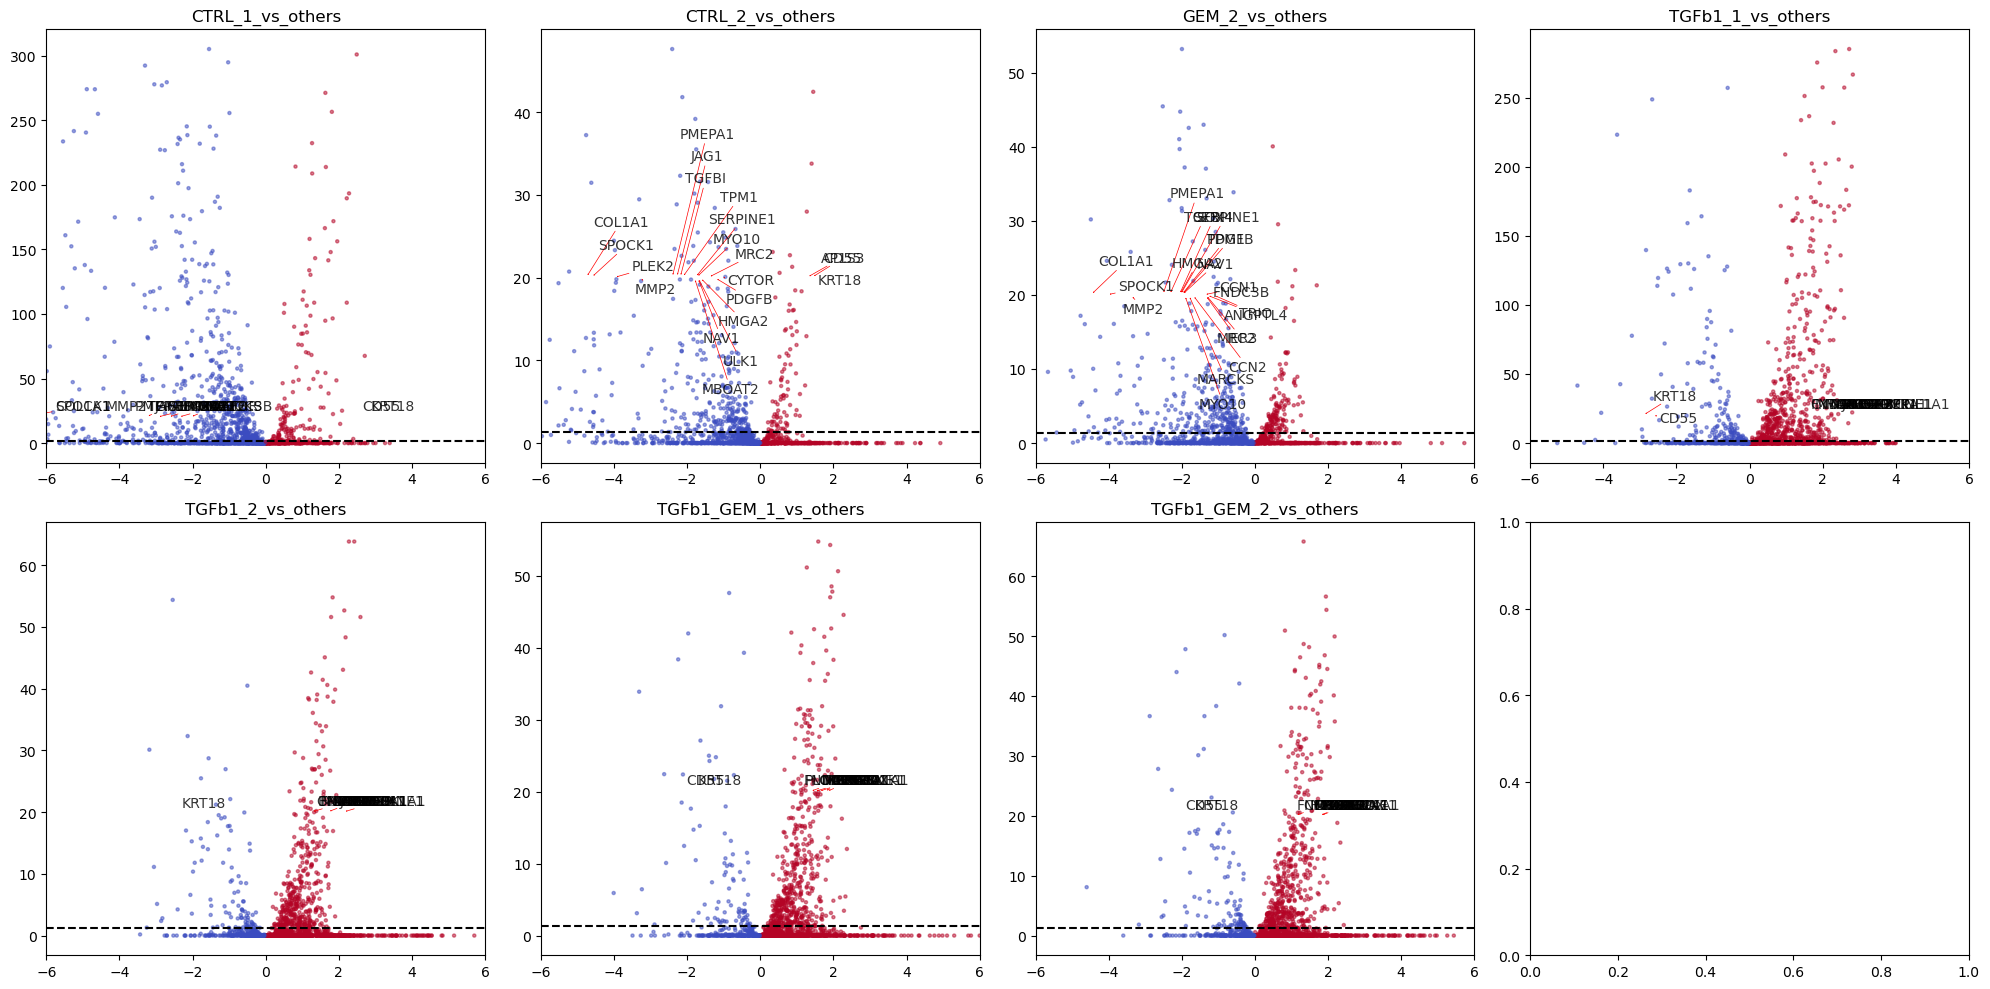

In [53]:
#... [previous part of the code]

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for idx, comparison in enumerate(sorted_unique_comparisons):
    ax = axs[idx // 4, idx % 4]

    filtered_results = results_df[results_df['comparison'] == comparison]

    # Scatter points
    ax.scatter(filtered_results['log2FC'], -np.log10(filtered_results['adjusted.p.value']),
               c=np.sign(filtered_results['log2FC']), cmap="coolwarm", alpha=0.5, s=5)
    
    # Horizontal line for p-value significance threshold, e.g., 0.05
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--')
    
    ax.set_title(comparison)
    ax.set_xlim(-6, 6)
    
    # Annotate significant genes based on fold change and adjusted p-value
    significant_genes = filtered_results[
        (filtered_results['log2FC'].abs() > 1) &  # You can adjust this threshold as per your requirement
        (filtered_results['adjusted.p.value'] < 0.05)
    ].nsmallest(20, 'adjusted.p.value')
    
    texts = []
    epsilon = 1e-20  # a small constant
    for _, row in significant_genes.iterrows():
        adj_pval = row['adjusted.p.value'] + epsilon
        y_val = -np.log10(adj_pval)
        if np.isfinite(y_val):
            texts.append(ax.text(row['log2FC'], y_val, row['symbol'], fontsize=10, alpha=0.8))
    
    adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.tight_layout()
plt.savefig("figures/volcano_plots.png")
plt.show()


In [54]:
plt.tight_layout()
plt.savefig("figures/volcano_plots.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [55]:
significant_mask = filtered_results["adjusted.p.value"] < 0.05  # Example threshold

significant_genes = filtered_results[significant_mask].sort_values(by="adjusted.p.value", ascending=True).head(20)
print(significant_genes)


                  comparison               ID    symbol  basemean    log2FC  \
11952  TGFb1_GEM_2_vs_others  ENSG00000217555      CKLF  1.476013  1.330385   
11953  TGFb1_GEM_2_vs_others  ENSG00000124225    PMEPA1  1.685247  1.940422   
11954  TGFb1_GEM_2_vs_others  ENSG00000106366  SERPINE1  3.133410  1.954942   
11955  TGFb1_GEM_2_vs_others  ENSG00000189403     HMGB1  2.713424  0.820984   
13943  TGFb1_GEM_2_vs_others  ENSG00000087086       FTL  3.887271 -0.830174   
11956  TGFb1_GEM_2_vs_others  ENSG00000108821    COL1A1  1.151487  2.178704   
11957  TGFb1_GEM_2_vs_others  ENSG00000011028      MRC2  1.176248  1.332279   
11958  TGFb1_GEM_2_vs_others  ENSG00000143797    MBOAT2  0.812632  1.481098   
13942  TGFb1_GEM_2_vs_others  ENSG00000111057     KRT18  1.460369 -1.900891   
11959  TGFb1_GEM_2_vs_others  ENSG00000152377    SPOCK1  0.745525  1.908247   
11960  TGFb1_GEM_2_vs_others  ENSG00000164032     H2AZ1  1.743612  1.235809   
11961  TGFb1_GEM_2_vs_others  ENSG00000087245      M

/home/s468630/micromamba/envs/scAnalysis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


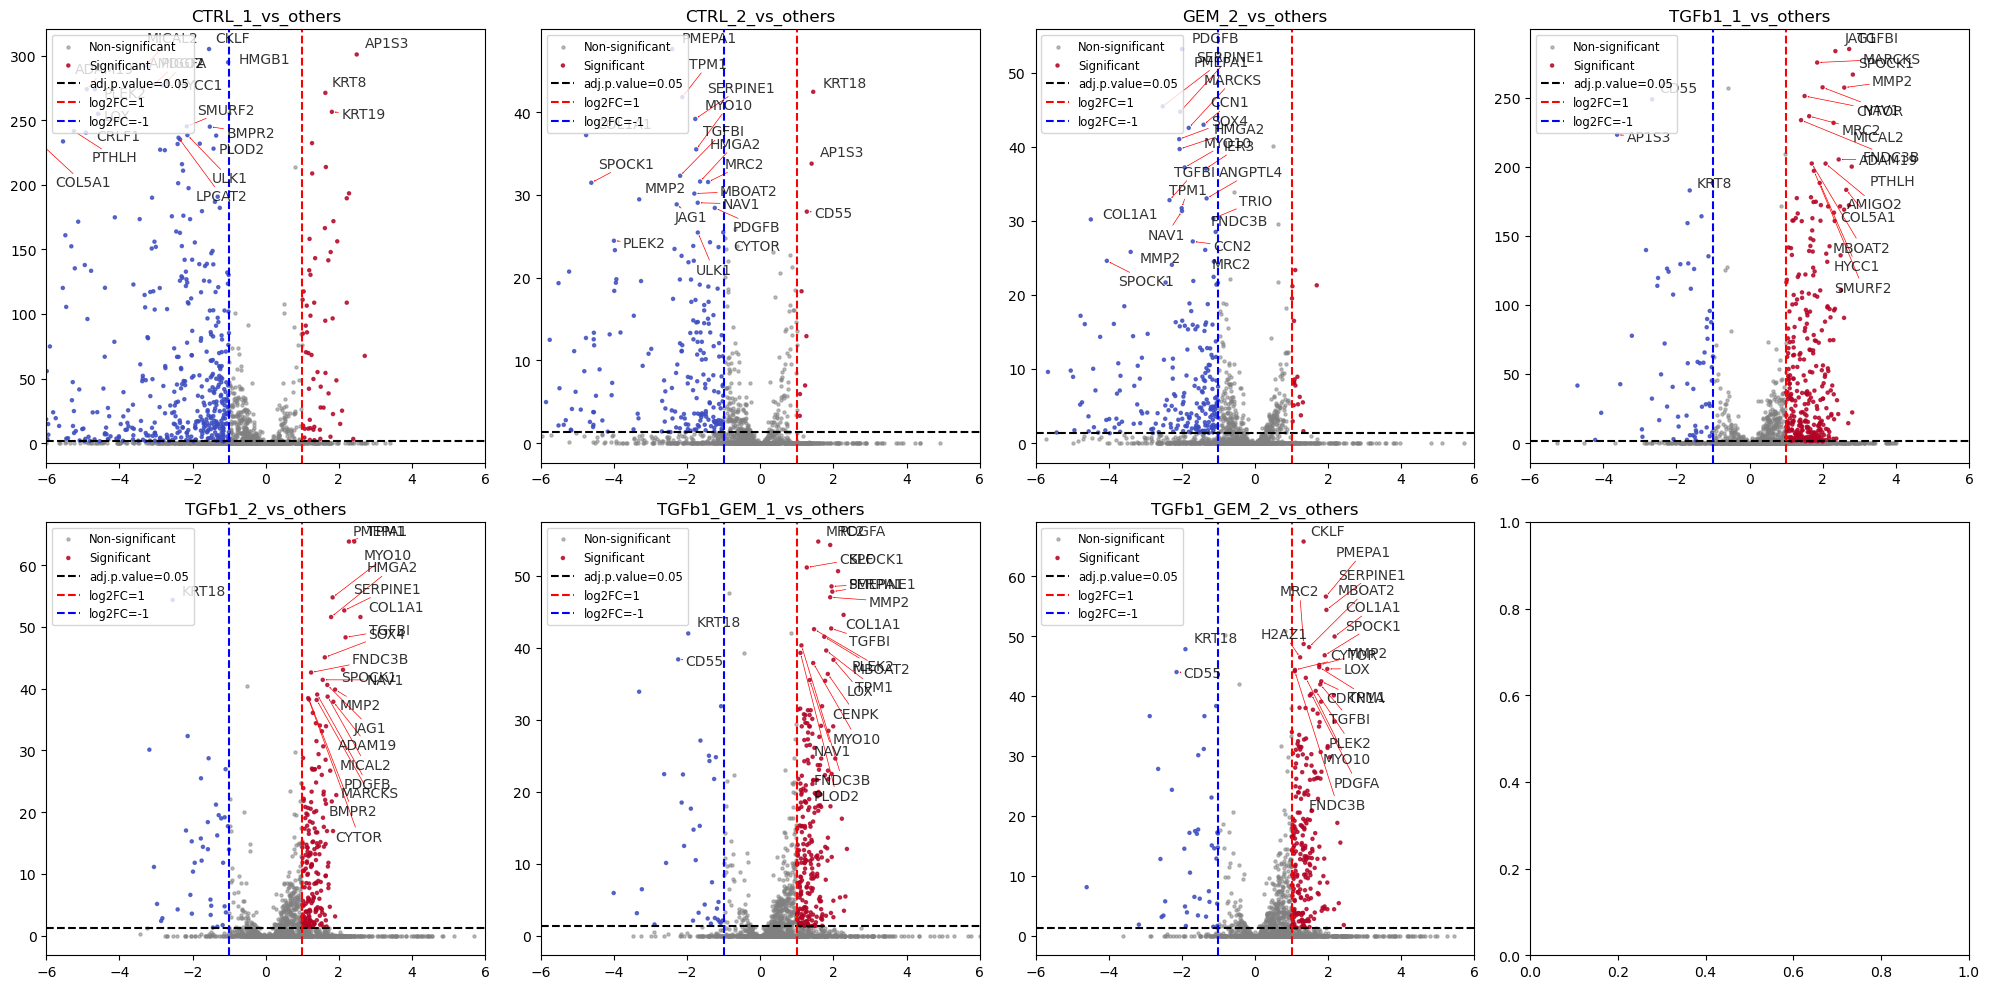

In [56]:
#... [previous part of the code]

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

log2fc_threshold = 1
adj_pval_threshold = 0.05

for idx, comparison in enumerate(sorted_unique_comparisons):
    ax = axs[idx // 4, idx % 4]

    filtered_results = results_df[results_df['comparison'] == comparison]

    # Define a mask for significant genes
    significant_mask = (filtered_results['log2FC'].abs() > log2fc_threshold) & (filtered_results['log2FC'] != 0) & (filtered_results['adjusted.p.value'] < adj_pval_threshold) & (filtered_results['adjusted.p.value'] != 0)

    # Scatter points: Non-significant
    ax.scatter(filtered_results.loc[~significant_mask, 'log2FC'], -np.log10(filtered_results.loc[~significant_mask, 'adjusted.p.value']),
               color='grey', alpha=0.5, s=5, label='Non-significant')
    
    # Scatter points: Significant
    ax.scatter(filtered_results.loc[significant_mask, 'log2FC'], -np.log10(filtered_results.loc[significant_mask, 'adjusted.p.value']),
               c=np.sign(filtered_results.loc[significant_mask, 'log2FC']), cmap="coolwarm", alpha=0.8, s=5, label='Significant')

    # Horizontal line for adjusted p-value significance threshold
    ax.axhline(y=-np.log10(adj_pval_threshold), color='black', linestyle='--', label=f'adj.p.value={adj_pval_threshold}')

    # Vertical lines for log2FC significance threshold
    ax.axvline(x=log2fc_threshold, color='red', linestyle='--', label=f'log2FC={log2fc_threshold}')
    ax.axvline(x=-log2fc_threshold, color='blue', linestyle='--', label=f'log2FC=-{log2fc_threshold}')

    ax.set_title(comparison)
    ax.set_xlim(-6, 6)
    ax.legend(loc='upper left', fontsize='small')

    # Annotate significant genes
    #significant_genes = filtered_results[significant_mask]
    #significant_genes = filtered_results[significant_mask].sort_values(by="adjusted.p.value", ascending=True)
    significant_genes = filtered_results[significant_mask].sort_values(by="adjusted.p.value", ascending=True).head(20)

    
    #.nsmallest(20, 'adjusted.p.value')
    #print(significant_genes)

    texts = []
    epsilon = 0 * 1e-20  # a small constant
    for _, row in significant_genes.iterrows():
        adj_pval = row['adjusted.p.value'] + epsilon
        y_val = -np.log10(adj_pval)
        if np.isfinite(y_val):
            texts.append(ax.text(row['log2FC'], y_val, row['symbol'], fontsize=10, alpha=0.8))
    
    adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.tight_layout()
plt.savefig("figures/volcano_plots.png")
plt.show()

# Differential Analysis Specific

## Analysis

In [57]:
group1 = '1resistant_all'
group2 = '2non-reistant_all'
comparison = group1 + "_vs_" + group2
#group1_cluster = ["3","15","6","9","4"]
group1_cluster = ["1","5","11","8","10","13","12","0","9","4"]
#group1_cluster = ["6","17"]
#group1_cluster = ["3","15"]
group2_cluster = ["2","7","14","17","3","15","6"]
#group2_cluster = ["1","5","11","8"]
#group2_cluster = ["2","7","14"]

In [58]:
# Define a function to label clusters:
# e.g. 5/11 to 2/16 
def label_clusters(cluster):
    if cluster in group1_cluster:
        return group1
    elif cluster in group2_cluster:
        return group2
    else:
        return "NA"  # This label will be used to filter out other clusters

# Create a new categorical column for comparison
adata.obs['compare_clusters'] = adata.obs['leiden'].map(label_clusters)

# Subset the data for only the two groups you're comparing
bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()

# sort indices to define the direction of comparison (could for interpretation of the results :)
sorted_indices = bdata.obs.sort_values(by='compare_clusters').index
bdata = bdata[sorted_indices]

# create a dataframe from bdata and translae ensembl ID to symbol (if not done before!!)
expression_df = bdata.to_df().T

In [59]:
unique_categories = bdata.obs['compare_clusters'].unique()
print(unique_categories)

['1resistant_all' '2non-reistant_all']


In [60]:
#sc.pp.log1p(bdata, base=10)

In [61]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(bdata, groupby='compare_clusters', groups=[group1, group2])

/home/s468630/micromamba/envs/scAnalysis/lib/python3.9/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [62]:
# Get differentially expressed genes for the comparison
de_genes = bdata.uns['rank_genes_groups']['names'][group2]

In [83]:
# Update the gene names (var_names) in adata with the mapped gene symbols
adata.var_names = result['symbol'].values

# Check the updated gene names
print(adata.var_names[:50])  # Print the first 50 gene symbols


Index(['H2AC6', 'HJURP', 'DIAPH3', 'ATAD2', 'TYMS', 'CENPK', 'CDK1', 'RRM2',
       'PTTG1', 'HMGB1', 'KIF20B', 'CKS2', 'UBE2T', 'ARL6IP1', 'TK1', 'RRM1',
       'NUSAP1', 'CENPW', 'BIRC5', 'MKI67', 'SMC4', 'TPX2', 'CENPF', 'H2AZ1',
       'TOP2A', 'PCLAF', 'PRC1', 'HMGB2', 'UBE2S', 'CEP55', 'ANLN', 'TUBA1B',
       'KIF11', 'TUBB4B', 'ZWINT', 'MELK', 'KNL1', 'SGO2', 'KIF2C', 'ECT2',
       'MYBL2', 'KIF4A', 'CLSPN', 'GTSE1', 'CKAP2', 'DLGAP5', 'SPDL1', 'HELLS',
       'CDKN3', 'GMNN'],
      dtype='object')


In [84]:
# Convert Ensembl IDs in the structured array
converted_gene_names = [
    (gene_names.get(pair[0], pair[0]), gene_names.get(pair[1], pair[1]))
    for pair in gene_ids
]

print(converted_gene_names[:10])  # Print the first 10 pairs of gene names

NameError: name 'gene_ids' is not defined

In [85]:
#ensembl_to_gene_name

In [86]:
# Convert result to dataframe
result = pd.DataFrame({
    'symbol': bdata.uns['rank_genes_groups']['names'][group1],
    'log2FC': bdata.uns['rank_genes_groups']['logfoldchanges'][group1],
    'p.value': bdata.uns['rank_genes_groups']['pvals'][group1],
    'adjusted.p.value': bdata.uns['rank_genes_groups']['pvals_adj'][group1]
})

In [87]:
# Calculate basemean expression for genes present in adata.var_names
result['basemean'] = [
    (bdata[:, gene].X.sum() / bdata.shape[0]) if gene in adata.var_names else 'NA' 
    for gene in result['symbol']
]


# Convert ensembl IDs to gene symbols
#result['symbol'] = result['ID'].map(ensembl_to_gene_name).fillna(result['ID'])
# Reverse the dictionary to map gene symbols to Ensembl IDs
gene_name_to_ensembl = {v: k for k, v in ensembl_to_gene_name.items() if v}
result['ensembl_id'] = result['symbol'].map(gene_name_to_ensembl).fillna(result['symbol'])


# Assign comparison name
result['comparison'] = group1 + "_vs_" + group2

# Sort by absolute log2FC
result = result.reindex(result['adjusted.p.value'].abs().sort_values(ascending=True).index)

In [88]:
# Map Ensembl IDs to gene symbols (ensure you have ensembl_to_gene_name dictionary)
result['symbol'] = result['ensembl_id'].map(ensembl_to_gene_name).fillna(result['ensembl_id'])

# Check if mapping was successful
print(result[['ensembl_id', 'symbol']].head(50))


           ensembl_id   symbol
0     ENSG00000180573    H2AC6
1962  ENSG00000123485    HJURP
1963  ENSG00000139734   DIAPH3
1964  ENSG00000156802    ATAD2
1960  ENSG00000176890     TYMS
1978  ENSG00000123219    CENPK
1979  ENSG00000170312     CDK1
1976  ENSG00000171848     RRM2
1972  ENSG00000164611    PTTG1
1971  ENSG00000189403    HMGB1
1970  ENSG00000138182   KIF20B
1969  ENSG00000123975     CKS2
1968  ENSG00000077152    UBE2T
1967  ENSG00000170540  ARL6IP1
1966  ENSG00000167900      TK1
1965  ENSG00000167325     RRM1
1980  ENSG00000137804   NUSAP1
1977  ENSG00000203760    CENPW
1986  ENSG00000089685    BIRC5
1985  ENSG00000148773    MKI67
1984  ENSG00000113810     SMC4
1991  ENSG00000088325     TPX2
1990  ENSG00000117724    CENPF
1989  ENSG00000164032    H2AZ1
1988  ENSG00000131747    TOP2A
1987  ENSG00000166803    PCLAF
1982  ENSG00000198901     PRC1
1981  ENSG00000164104    HMGB2
1974  ENSG00000108106    UBE2S
1975  ENSG00000138180    CEP55
1973  ENSG00000011426     ANLN
1983  EN

In [89]:
result.head(50)

symbol    log2FC        p.value  adjusted.p.value basemean  \
0       H2AC6  2.501786   0.000000e+00      0.000000e+00       NA   
1962    HJURP -4.039871   0.000000e+00      0.000000e+00       NA   
1963   DIAPH3 -4.611213   0.000000e+00      0.000000e+00       NA   
1964    ATAD2 -3.492126   0.000000e+00      0.000000e+00       NA   
1960     TYMS -3.286447   0.000000e+00      0.000000e+00       NA   
1978    CENPK -3.987631   0.000000e+00      0.000000e+00       NA   
1979     CDK1 -6.012107   0.000000e+00      0.000000e+00       NA   
1976     RRM2 -5.159357   0.000000e+00      0.000000e+00       NA   
1972    PTTG1 -3.672705   0.000000e+00      0.000000e+00       NA   
1971    HMGB1 -1.339958   0.000000e+00      0.000000e+00       NA   
1970   KIF20B -3.779052   0.000000e+00      0.000000e+00       NA   
1969     CKS2 -2.570956   0.000000e+00      0.000000e+00       NA   
1968    UBE2T -3.603997   0.000000e+00      0.000000e+00       NA   
1967  ARL6IP1 -2.291240   0.000000e+00      0.000000e+00       NA   
1966      TK1 -4.171119   0.000000e+00      0.000000e+00       NA   
1965     RRM1 -2.647724   0.000000e+00      0.000000e+00       NA   
1980   NUSAP1 -5.215863   0.000000e+00      0.000000e+00       NA   
1977    CENPW -3.513862   0.000000e+00      0.000000e+00       NA   
1986    BIRC5 -4.869830   0.000000e+00      0.000000e+00       NA   
1985    MKI67 -6.011734   0.000000e+00      0.000000e+00       NA   
1984     SMC4 -3.588720   0.000000e+00      0.000000e+00       NA   
1991     TPX2 -5.140073   0.000000e+00      0.000000e+00       NA   
1990    CENPF -4.773790   0.000000e+00      0.000000e+00       NA   
1989    H2AZ1 -2.534503   0.000000e+00      0.000000e+00       NA   
1988    TOP2A -5.988894   0.000000e+00      0.000000e+00       NA   
1987    PCLAF -3.736714   0.000000e+00      0.000000e+00       NA   
1982     PRC1 -4.516142   0.000000e+00      0.000000e+00       NA   
1981    HMGB2 -3.445555   0.000000e+00      0.000000e+00       NA   
1974    UBE2S -2.610490   0.000000e+00      0.000000e+00       NA   
1975    CEP55 -4.533696   0.000000e+00      0.000000e+00       NA   
1973     ANLN -4.216364   0.000000e+00      0.000000e+00       NA   
1983   TUBA1B -2.418672   0.000000e+00      0.000000e+00       NA   
1961    KIF11 -4.477345   0.000000e+00      0.000000e+00       NA   
1958   TUBB4B -2.145011   0.000000e+00      0.000000e+00       NA   
1959    ZWINT -4.391766  3.623857e-309     2.062492e-307       NA   
1957     MELK -4.122223  1.075828e-306     5.952915e-305       NA   
1955     KNL1 -4.686186  6.997708e-301     3.767415e-299       NA   
1954     SGO2 -3.797532  1.531332e-300     8.027401e-299       NA   
1956    KIF2C -5.693276  1.852965e-299     9.464374e-298       NA   
1951     ECT2 -3.102911  2.865556e-296     1.427047e-294       NA   
1953    MYBL2 -4.456852  9.047255e-290     4.395642e-288       NA   
1952    KIF4A -5.143038  6.355024e-284     3.014097e-282       NA   
1949    CLSPN -4.228226  1.726330e-277     7.997324e-276       NA   
1950    GTSE1 -5.340889  1.849513e-277     8.373250e-276       NA   
1947    CKAP2 -3.501679  2.363492e-271     1.046239e-269       NA   
1948   DLGAP5 -5.063789  1.124936e-266     4.871461e-265       NA   
1937    SPDL1 -2.450248  5.768196e-266     2.444733e-264       NA   
1943    HELLS -3.077923  2.432479e-263     1.009479e-261       NA   
1945    CDKN3 -4.411907  2.859344e-263     1.162411e-261       NA   
1939     GMNN -2.450559  4.786595e-263     1.906980e-261       NA   

           ensembl_id                           comparison  
0     ENSG00000180573  1resistant_all_vs_2non-reistant_all  
1962  ENSG00000123485  1resistant_all_vs_2non-reistant_all  
1963  ENSG00000139734  1resistant_all_vs_2non-reistant_all  
1964  ENSG00000156802  1resistant_all_vs_2non-reistant_all  
1960  ENSG00000176890  1resistant_all_vs_2non-reistant_all  
1978  ENSG00000123219  1resistant_all_vs_2non-reistant_all  
1979  ENSG00000170312  1resistant_all_vs_2non-reistant_all  

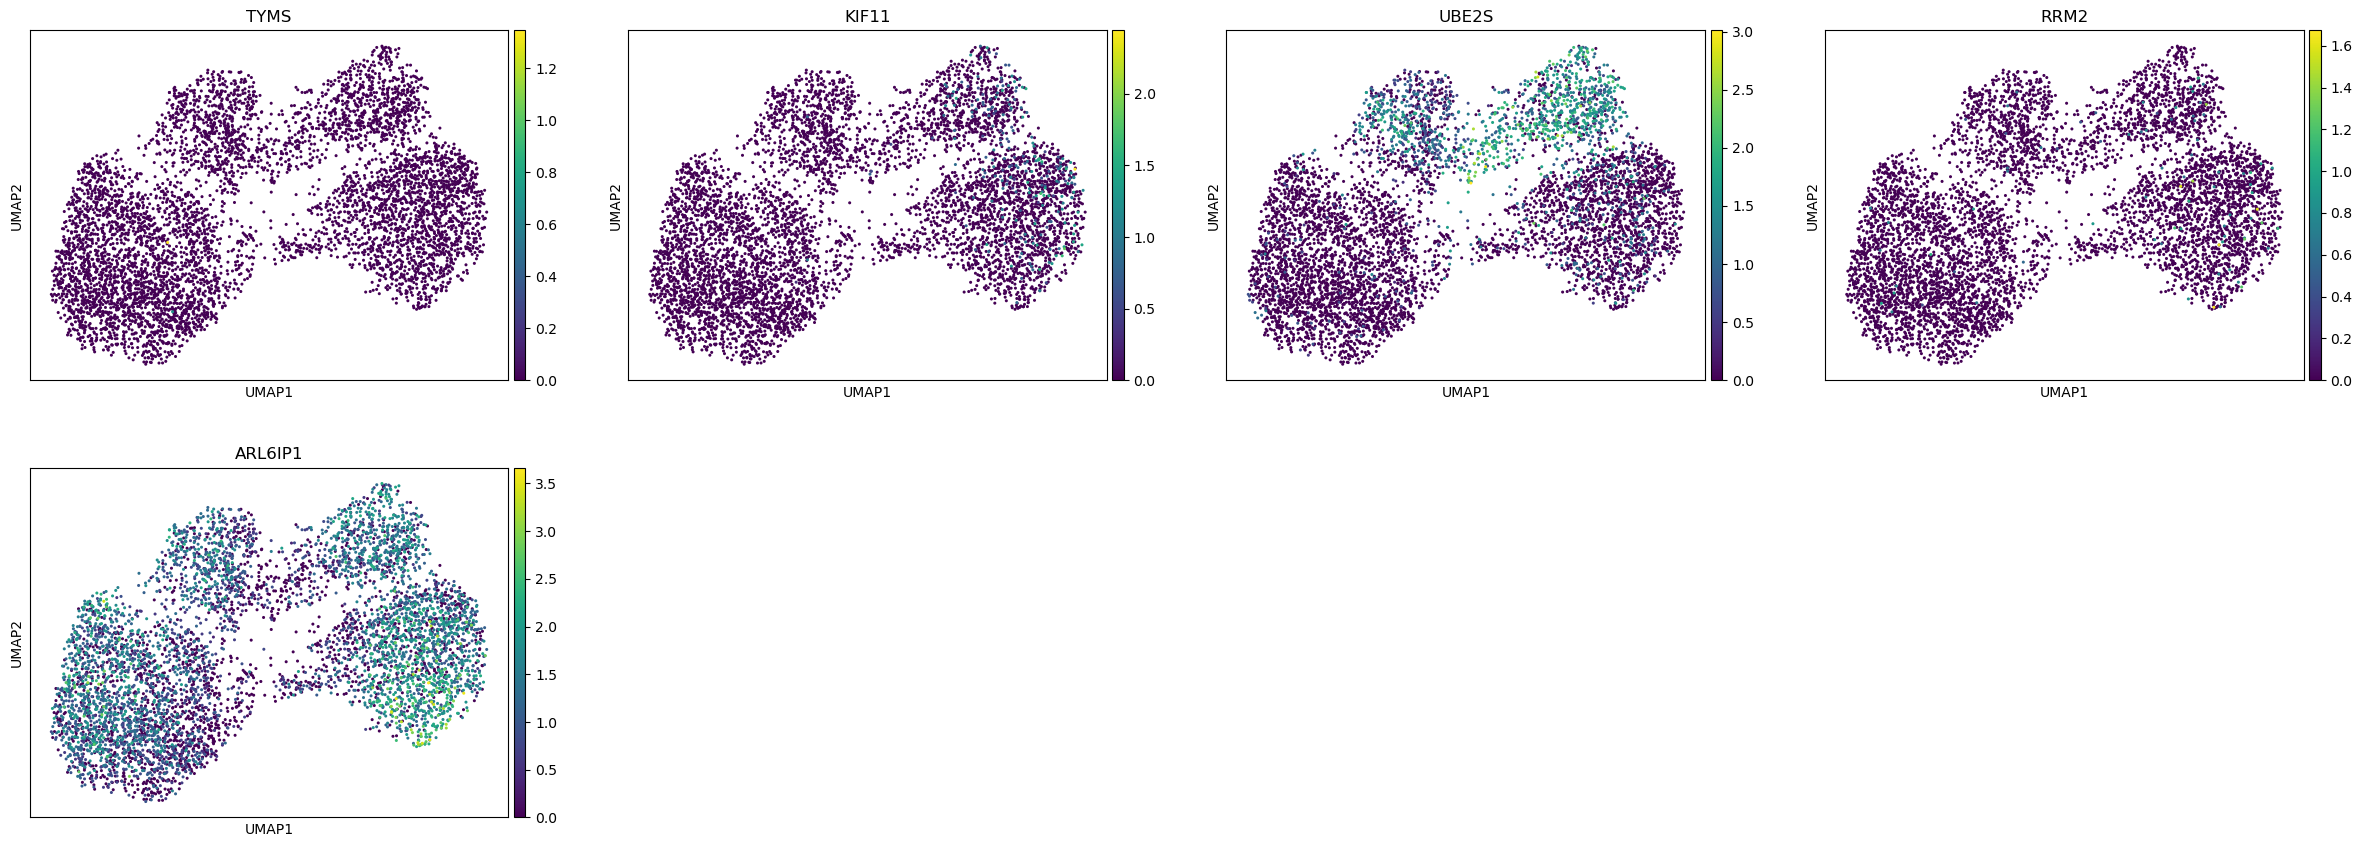

In [90]:
sc.pl.umap(adata, color=["TYMS", 'KIF11','UBE2S','RRM2',"ARL6IP1"])

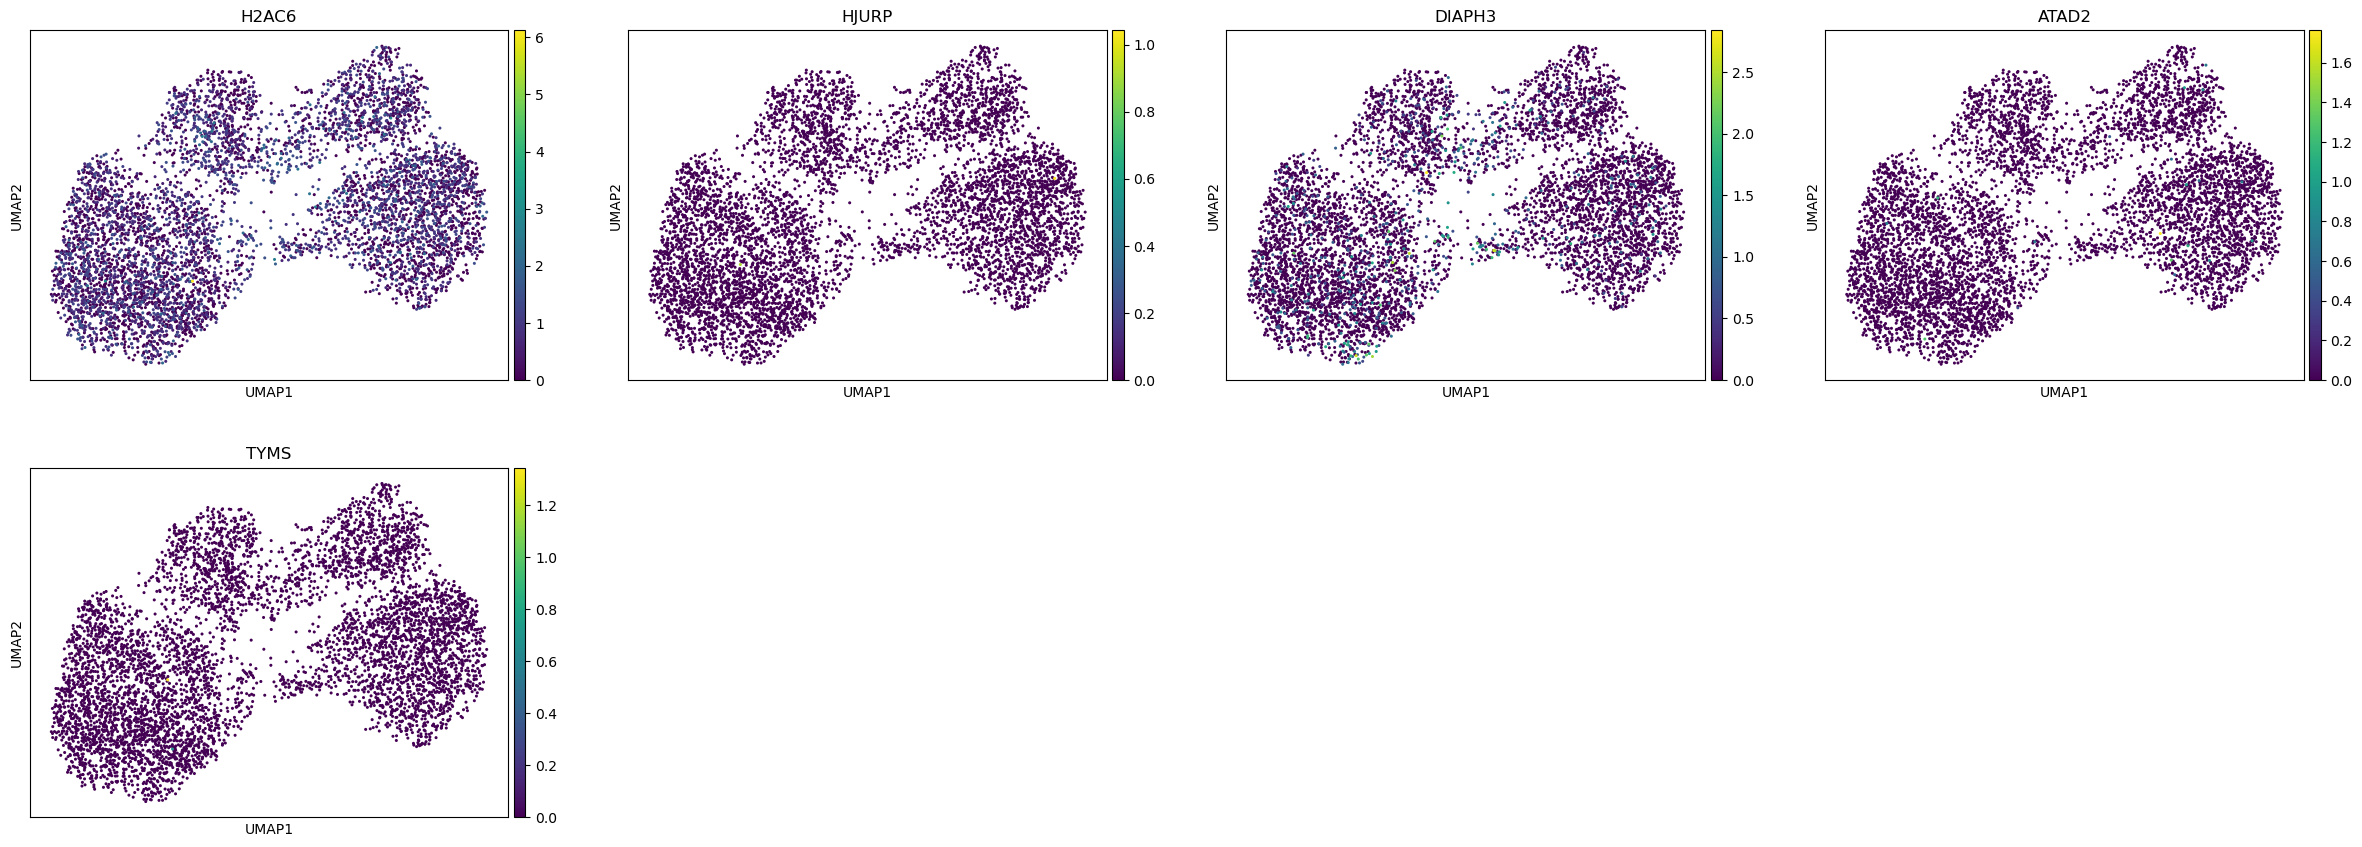

In [91]:
high_variance_genes = adata.var[adata.var['highly_variable']].index
sc.pl.umap(adata, color=high_variance_genes[:5])  # Visualizing the top 5 most variable genes


In [92]:
#Specify the path for the output text file
output_file = '../../data/deg_' + comparison + '.txt'

result.to_csv(output_file, sep='\t', index=False)

print(f"Differentially expressed genes saved to {output_file}")

Differentially expressed genes saved to ../../data/deg_1resistant_all_vs_2non-reistant_all.txt


## Barplot

/tmp/ipykernel_1273922/652263199.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_by_pvalue, x="log2FC", y="symbol", palette=log2FC_colors, edgecolor=".2", ax=ax)


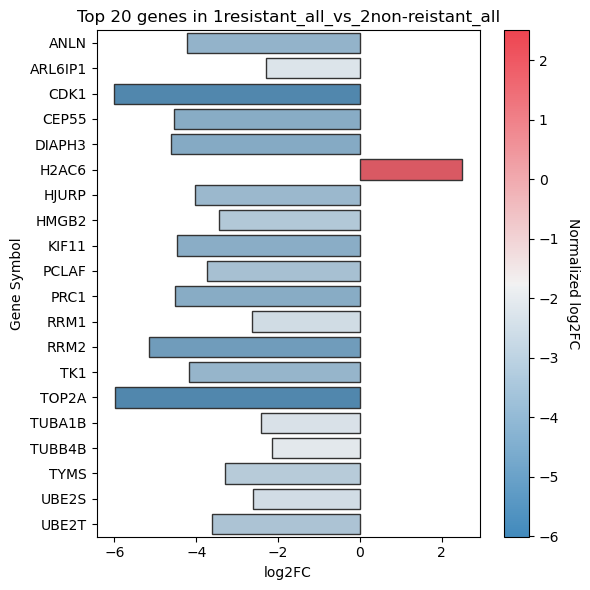

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assume filtered_results is already defined
comparison = group1 + "_vs_" + group2

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
fig.subplots_adjust(hspace=0.5)  # Adjust space between plots

# Get top 20 genes
n_top_genes = 20
top_by_pvalue = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(n_top_genes).copy()

# Now, sort those top genes by symbol
top_by_pvalue = top_by_pvalue.sort_values(by="symbol", ascending=True)

# Convert necessary columns to float
top_by_pvalue['log2FC'] = pd.to_numeric(top_by_pvalue['log2FC'], errors='coerce')
top_by_pvalue['basemean'] = pd.to_numeric(top_by_pvalue['basemean'], errors='coerce')

# Normalize values for color mapping
norm_log2FC = plt.Normalize(top_by_pvalue["log2FC"].min(), top_by_pvalue["log2FC"].max())
norm_basemean = plt.Normalize(top_by_pvalue["basemean"].min(), top_by_pvalue["basemean"].max())

# Generate a color mapping for log2FC
cmap = sns.diverging_palette(240, 10, s=80, l=55, as_cmap=True)  # Blue to white to red
log2FC_colors = [cmap(norm_log2FC(val)) for val in top_by_pvalue["log2FC"]]

# Generate a bar plot
sns.barplot(data=top_by_pvalue, x="log2FC", y="symbol", palette=log2FC_colors, edgecolor=".2", ax=ax)
ax.set_title(f"Top {n_top_genes} genes in {comparison}")
ax.set_xlabel('log2FC')
ax.set_ylabel('Gene Symbol')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_log2FC)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Normalized log2FC", rotation=270, labelpad=15)

# Save and show the plot
plt.tight_layout()
plt.savefig(f"../../figures/barplot_{comparison}.png")
plt.show()


## Volcano

/home/s468630/micromamba/envs/scAnalysis/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


      symbol    log2FC        p.value  adjusted.p.value basemean  \
1959   ZWINT -4.391766  3.623857e-309     2.062492e-307       NA   
1957    MELK -4.122223  1.075828e-306     5.952915e-305       NA   
1955    KNL1 -4.686186  6.997708e-301     3.767415e-299       NA   
1954    SGO2 -3.797532  1.531332e-300     8.027401e-299       NA   
1956   KIF2C -5.693276  1.852965e-299     9.464374e-298       NA   
1951    ECT2 -3.102911  2.865556e-296     1.427047e-294       NA   
1953   MYBL2 -4.456852  9.047255e-290     4.395642e-288       NA   
1952   KIF4A -5.143038  6.355024e-284     3.014097e-282       NA   
1949   CLSPN -4.228226  1.726330e-277     7.997324e-276       NA   
1950   GTSE1 -5.340889  1.849513e-277     8.373250e-276       NA   
1947   CKAP2 -3.501679  2.363492e-271     1.046239e-269       NA   
1948  DLGAP5 -5.063789  1.124936e-266     4.871461e-265       NA   
1937   SPDL1 -2.450248  5.768196e-266     2.444733e-264       NA   
1943   HELLS -3.077923  2.432479e-263     1.0094

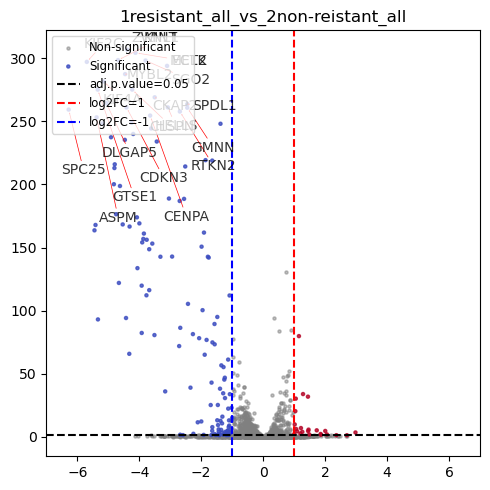

In [97]:
## Take care: zero pvalue cannot be displayed

filtered_results = result
comparison = group1 + "_vs_" + group2

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

log2fc_threshold = 1
adj_pval_threshold = 0.05

# Define a mask for significant genes
significant_mask = (filtered_results['log2FC'].abs() > log2fc_threshold) & (filtered_results['log2FC'] != 0) & (filtered_results['adjusted.p.value'] < adj_pval_threshold) & (filtered_results['adjusted.p.value'] != 0)

# Scatter points: Non-significant
ax.scatter(filtered_results.loc[~significant_mask, 'log2FC'], -np.log10(filtered_results.loc[~significant_mask, 'adjusted.p.value']),
           color='grey', alpha=0.5, s=5, label='Non-significant')

# Scatter points: Significant
ax.scatter(filtered_results.loc[significant_mask, 'log2FC'], -np.log10(filtered_results.loc[significant_mask, 'adjusted.p.value']),
           c=np.sign(filtered_results.loc[significant_mask, 'log2FC']), cmap="coolwarm", alpha=0.8, s=5, label='Significant')

# Horizontal line for adjusted p-value significance threshold
ax.axhline(y=-np.log10(adj_pval_threshold), color='black', linestyle='--', label=f'adj.p.value={adj_pval_threshold}')

# Vertical lines for log2FC significance threshold
ax.axvline(x=log2fc_threshold, color='red', linestyle='--', label=f'log2FC={log2fc_threshold}')
ax.axvline(x=-log2fc_threshold, color='blue', linestyle='--', label=f'log2FC=-{log2fc_threshold}')

ax.set_title(comparison)
ax.set_xlim(-7, 7)
#ax.set_ylim(-7, 400)
ax.legend(loc='upper left', fontsize='small')

# Annotate significant genes
#significant_genes = filtered_results[significant_mask]
#significant_genes = filtered_results[significant_mask].sort_values(by="adjusted.p.value", ascending=True)
significant_genes = filtered_results[significant_mask].sort_values(by="adjusted.p.value", ascending=True).head(20)


#.nsmallest(20, 'adjusted.p.value')
print(significant_genes)

texts = []
epsilon = 0 * 1e-20  # a small constant
for _, row in significant_genes.iterrows():
    adj_pval = row['adjusted.p.value'] + epsilon
    y_val = -np.log10(adj_pval)
    if np.isfinite(y_val):
        texts.append(ax.text(row['log2FC'], y_val, row['symbol'], fontsize=10, alpha=0.8))

adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))


plt.tight_layout()
plt.savefig("../../figures/volcano_" + comparison + ".png")
plt.show()

## Test why many genes have zero pvalue

### to test why some genes have zero pvalues I look at the expression values (counts) and calculate the mean count for each genes and each group that is compared int the differential expression

#### than I filter for different criteria, or the gene symbol/IDs with zero pvalue and standard deviation

In [98]:
import scanpy as sc
import pandas as pd
import numpy as np

# Assuming you have your AnnData object 'adata'
# Step 1: Calculate the mean and standard deviation for each gene in each cluster
unique_clusters = adata.obs['compare_clusters'].unique()

# Initialize DataFrames to store the mean, standard deviation, and cell counts
mean_expression = pd.DataFrame(index=adata.var_names)
std_expression = pd.DataFrame(index=adata.var_names)
cell_counts = {}

# Calculate the mean and standard deviation for each cluster
for cluster in unique_clusters:
    # Select cells belonging to the current cluster
    cluster_cells = adata[adata.obs['compare_clusters'] == cluster]
    
    # Convert sparse matrix to dense
    dense_matrix = cluster_cells.X.toarray()
    
    # Calculate the mean expression for the current cluster
    mean_expression[cluster] = dense_matrix.mean(axis=0)
    
    # Calculate the standard deviation for the current cluster
    std_expression[cluster] = dense_matrix.std(axis=0)
    
    # Store the number of cells in the current cluster
    cell_counts[cluster] = dense_matrix.shape[0]

# Step 2: Combine the mean and standard deviation into a single DataFrame
combined_expression = pd.concat([mean_expression, std_expression], axis=1, keys=['Mean', 'Std'])

# Step 3: Filter genes of interest
# List of gene symbols to filter
gene_symbols = [
    "ARHGAP32",
    "ITGAV",
    "ADAMTS14",
    "ARHGEF2",
    "CDA",
    "FAM13A",
    "COL6A2",
    "PDE10A",
    "LINC00944",
    "CA8",
    "DISP3"
]

# Filter the combined DataFrame using the gene symbols
filtered_combined_expression = combined_expression.loc[combined_expression.index.intersection(gene_symbols)]

# Add cell counts as columns
for cluster in unique_clusters:
    filtered_combined_expression[f'Cell_Count_{cluster}'] = cell_counts[cluster]

# Display the filtered_combined_expression DataFrame
print(filtered_combined_expression)


                    Mean                              Std                    \
          1resistant_all 2non-reistant_all 1resistant_all 2non-reistant_all   
CA8             0.139356          1.036108       0.329494          0.652049   
FAM13A          0.087976          1.455461       0.290218          0.798397   
ITGAV           0.104251          1.032233       0.313967          0.743856   
CDA             0.169245          1.367464       0.411703          0.656972   
COL6A2          0.257749          1.558018       0.495907          0.854567   
ARHGAP32        1.014798          0.270433       0.792117          0.488565   
LINC00944       0.120263          1.013183       0.319459          0.620810   
PDE10A          0.001664          0.002977       0.043313          0.046504   
ADAMTS14        0.055109          0.869079       0.230004          0.635739   
DISP3           0.937040          2.151612       0.661408          0.837663   
ARHGEF2         0.000489          0.000281       0.0

In [99]:
filtered_combined_expression

Mean                              Std                    \
          1resistant_all 2non-reistant_all 1resistant_all 2non-reistant_all   
CA8             0.139356          1.036108       0.329494          0.652049   
FAM13A          0.087976          1.455461       0.290218          0.798397   
ITGAV           0.104251          1.032233       0.313967          0.743856   
CDA             0.169245          1.367464       0.411703          0.656972   
COL6A2          0.257749          1.558018       0.495907          0.854567   
ARHGAP32        1.014798          0.270433       0.792117          0.488565   
LINC00944       0.120263          1.013183       0.319459          0.620810   
PDE10A          0.001664          0.002977       0.043313          0.046504   
ADAMTS14        0.055109          0.869079       0.230004          0.635739   
DISP3           0.937040          2.151612       0.661408          0.837663   
ARHGEF2         0.000489          0.000281       0.024207          0.011257   

          Cell_Count_1resistant_all Cell_Count_2non-reistant_all  
                                                                  
CA8                            4628                         1607  
FAM13A                         4628                         1607  
ITGAV                          4628                         1607  
CDA                            4628                         1607  
COL6A2                         4628                         1607  
ARHGAP32                       4628                         1607  
LINC00944                      4628                         1607  
PDE10A                         4628                         1607  
ADAMTS14                       4628                         1607  
DISP3                          4628                         1607  
ARHGEF2                        4628                         1607

In [100]:
# Display the filtered combined expression DataFrame to the user
import ace_tools_open as tools; 
tools.display_dataframe_to_user(name="Filtered Combined Expression (Mean and Std)", dataframe=filtered_combined_expression)


Filtered Combined Expression (Mean and Std)


### Caclulate a t test in the average count per group and the Std (just to make easy stats)


In [101]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind_from_stats


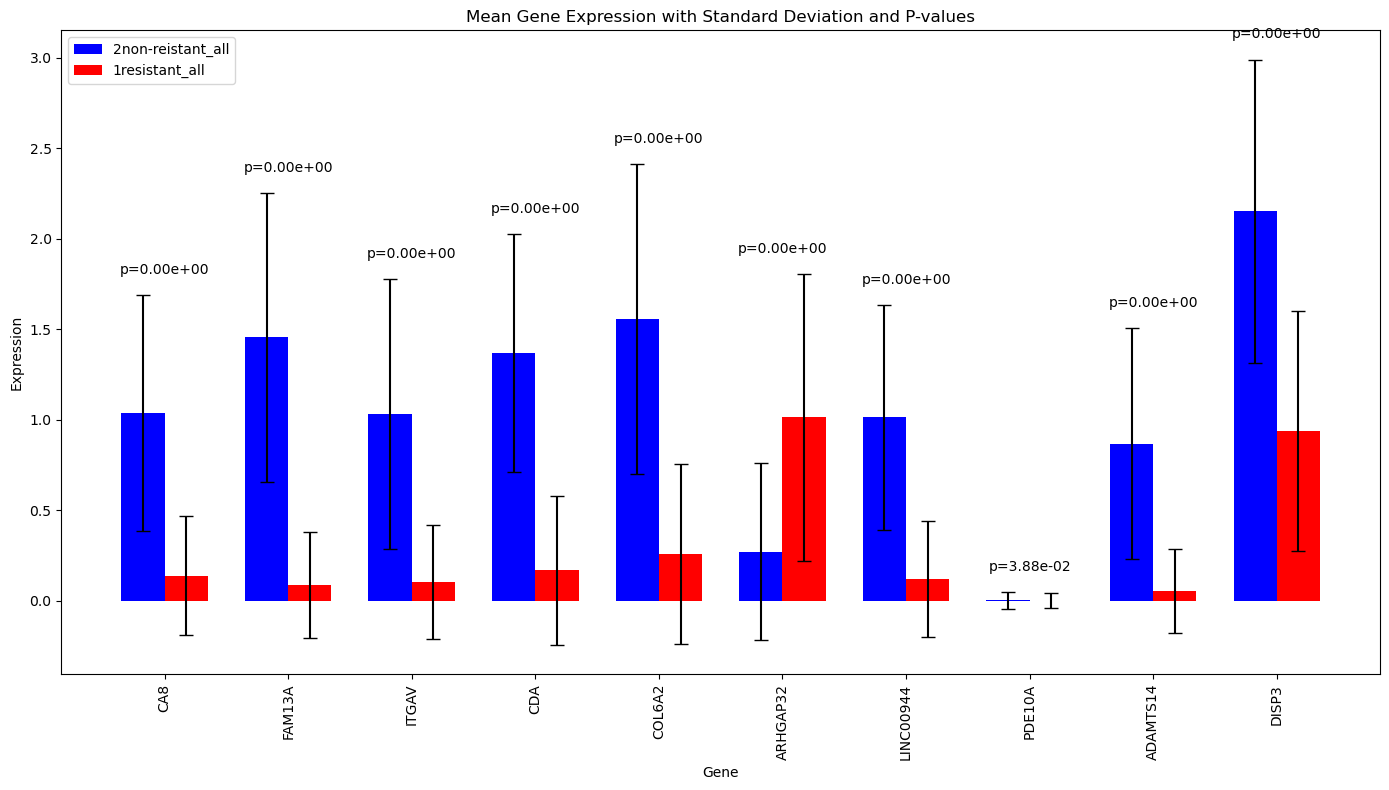

In [102]:
# Extract the first ten rows (already have 11 here)
filtered_combined_expression = filtered_combined_expression.head(10)

# Convert to dictionary format
data = {
    'Gene': filtered_combined_expression.index.tolist(),
    'Mean_2non_reistant_all': filtered_combined_expression[('Mean', '2non-reistant_all')].tolist(),
    'Mean_1resistant_all': filtered_combined_expression[('Mean', '1resistant_all')].tolist(),
    'Std_2non_reistant_all': filtered_combined_expression[('Std', '2non-reistant_all')].tolist(),
    'Std_1resistant_all': filtered_combined_expression[('Std', '1resistant_all')].tolist()
}



df = pd.DataFrame(data)
df.set_index('Gene', inplace=True)

# Perform t-tests
results = []
for gene in df.index:
    mean1 = df.loc[gene, 'Mean_2non_reistant_all']
    std1 = df.loc[gene, 'Std_2non_reistant_all']
    mean2 = df.loc[gene, 'Mean_1resistant_all']
    std2 = df.loc[gene, 'Std_1resistant_all']
    
    # Assume equal sample sizes for simplicity, adjust if necessary
    n1 = n2 = 10000  # Example sample sizes
    
    # Calculate t-test
    t_stat, p_value = ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False)
    results.append((gene, t_stat, p_value))

# Create a DataFrame with the t-test results
ttest_results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'P-value'])
ttest_results_df.set_index('Gene', inplace=True)

# Plot the mean values with standard deviations and annotate with p-values
plt.figure(figsize=(14, 8))

bar_width = 0.35
genes = df.index
index = range(len(genes))

# Bar plots for the two conditions
bar1 = plt.bar(index, df['Mean_2non_reistant_all'], bar_width, yerr=df['Std_2non_reistant_all'], label='2non-reistant_all', capsize=5, color='blue')
bar2 = plt.bar([i + bar_width for i in index], df['Mean_1resistant_all'], bar_width, yerr=df['Std_1resistant_all'], label='1resistant_all', capsize=5, color='red')

# Annotate p-values
for i, gene in enumerate(genes):
    p_value = ttest_results_df.loc[gene, 'P-value']
    plt.text(i + bar_width / 2, max(df.loc[gene, 'Mean_2non_reistant_all'] + df.loc[gene, 'Std_2non_reistant_all'], df.loc[gene, 'Mean_1resistant_all'] + df.loc[gene, 'Std_1resistant_all']) + 0.1, f'p={p_value:.2e}', ha='center', va='bottom')

plt.xlabel('Gene')
plt.ylabel('Expression')
plt.title('Mean Gene Expression with Standard Deviation and P-values')
plt.xticks([i + bar_width / 2 for i in index], genes, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


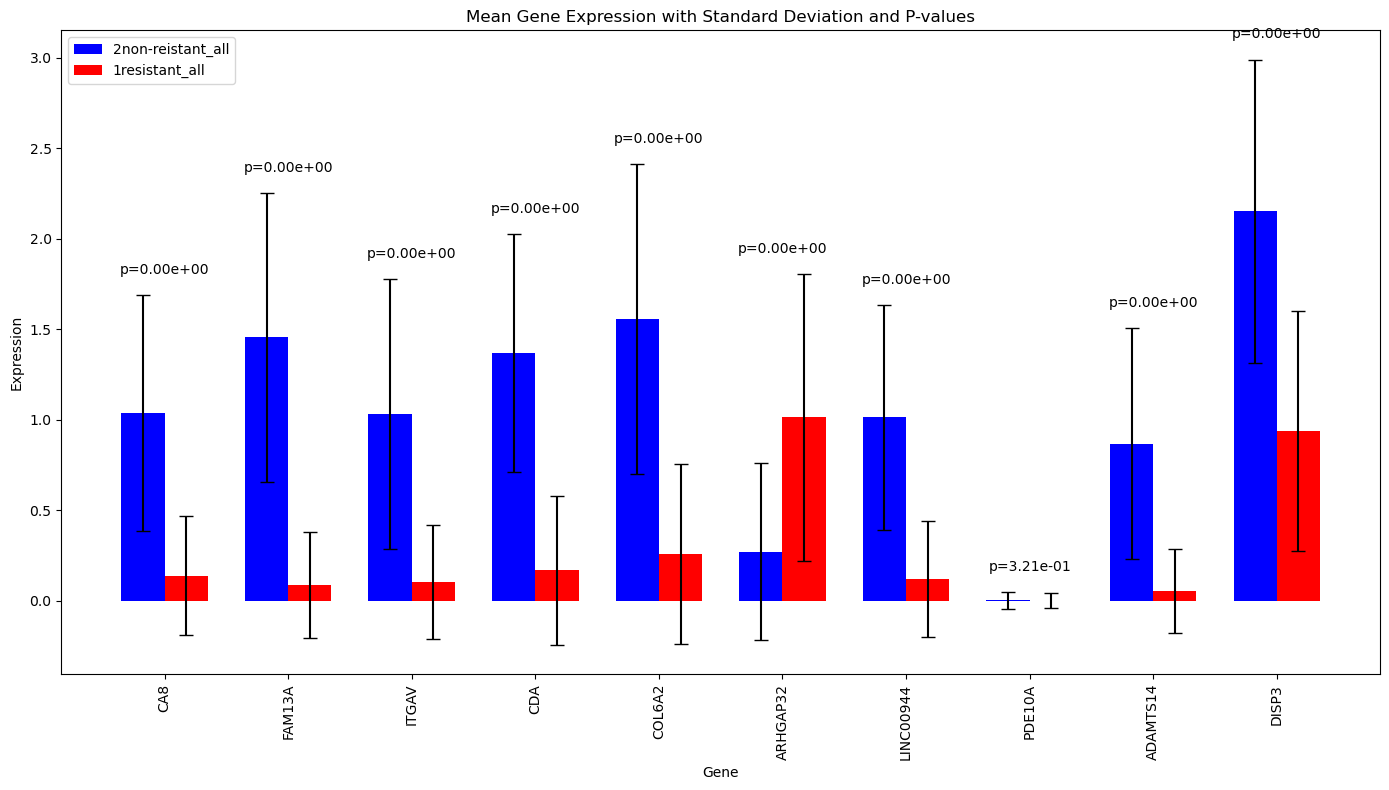

In [104]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats

# Assuming you have your AnnData object 'adata'
# Step 1: Calculate the mean and standard deviation for each gene in each cluster
unique_clusters = adata.obs['compare_clusters'].unique()

# Initialize DataFrames to store the mean, standard deviation, and cell counts
mean_expression = pd.DataFrame(index=adata.var_names)
std_expression = pd.DataFrame(index=adata.var_names)
cell_counts = {}

# Calculate the mean and standard deviation for each cluster
for cluster in unique_clusters:
    # Select cells belonging to the current cluster
    cluster_cells = adata[adata.obs['compare_clusters'] == cluster]
    
    # Convert sparse matrix to dense
    dense_matrix = cluster_cells.X.toarray()
    
    # Calculate the mean expression for the current cluster
    mean_expression[cluster] = dense_matrix.mean(axis=0)
    
    # Calculate the standard deviation for the current cluster
    std_expression[cluster] = dense_matrix.std(axis=0)
    
    # Store the number of cells in the current cluster
    cell_counts[cluster] = dense_matrix.shape[0]

# Step 2: Combine the mean and standard deviation into a single DataFrame
combined_expression = pd.concat([mean_expression, std_expression], axis=1, keys=['Mean', 'Std'])

# Step 3: Filter genes of interest
# List of gene symbols to filter
gene_symbols = [
     "ARHGAP32",
    "ITGAV",
    "ADAMTS14",
    "ARHGEF2",
    "CDA",
    "FAM13A",
    "COL6A2",
    "PDE10A",
    "LINC00944",
    "CA8",
    "DISP3"
]

# Filter the combined DataFrame using the gene symbols
filtered_combined_expression = combined_expression.loc[combined_expression.index.intersection(gene_symbols)]

# Add cell counts as columns
for cluster in unique_clusters:
    filtered_combined_expression[f'Cell_Count_{cluster}'] = cell_counts[cluster]

# Extract the first ten rows (already have 11 here)
filtered_combined_expression = filtered_combined_expression.head(10)

# Convert to dictionary format
data = {
    'Gene': filtered_combined_expression.index.tolist(),
    'Mean_2non_reistant_all': filtered_combined_expression[('Mean', '2non-reistant_all')].tolist(),
    'Mean_1resistant_all': filtered_combined_expression[('Mean', '1resistant_all')].tolist(),
    'Std_2non_reistant_all': filtered_combined_expression[('Std', '2non-reistant_all')].tolist(),
    'Std_1resistant_all': filtered_combined_expression[('Std', '1resistant_all')].tolist(),
    'Cell_Count_2non_reistant_all': filtered_combined_expression['Cell_Count_2non-reistant_all'].tolist(),
    'Cell_Count_1resistant_all': filtered_combined_expression['Cell_Count_1resistant_all'].tolist()
}

# Convert the dictionary back to a DataFrame
df = pd.DataFrame(data)
df.set_index('Gene', inplace=True)

# Perform t-tests
results = []
for gene in df.index:
    mean1 = df.loc[gene, 'Mean_2non_reistant_all']
    std1 = df.loc[gene, 'Std_2non_reistant_all']
    mean2 = df.loc[gene, 'Mean_1resistant_all']
    std2 = df.loc[gene, 'Std_1resistant_all']
    n1 = df.loc[gene, 'Cell_Count_2non_reistant_all']
    n2 = df.loc[gene, 'Cell_Count_1resistant_all']
    
    # Calculate t-test
    t_stat, p_value = ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False)
    results.append((gene, t_stat, p_value))

# Create a DataFrame with the t-test results
ttest_results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'P-value'])
ttest_results_df.set_index('Gene', inplace=True)

# Plot the mean values with standard deviations and annotate with p-values
plt.figure(figsize=(14, 8))

bar_width = 0.35
genes = df.index
index = range(len(genes))

# Bar plots for the two conditions
bar1 = plt.bar(index, df['Mean_2non_reistant_all'], bar_width, yerr=df['Std_2non_reistant_all'], label='2non-reistant_all', capsize=5, color='blue')
bar2 = plt.bar([i + bar_width for i in index], df['Mean_1resistant_all'], bar_width, yerr=df['Std_1resistant_all'], label='1resistant_all', capsize=5, color='red')

# Annotate p-values
for i, gene in enumerate(genes):
    p_value = ttest_results_df.loc[gene, 'P-value']
    plt.text(i + bar_width / 2, max(df.loc[gene, 'Mean_2non_reistant_all'] + df.loc[gene, 'Std_2non_reistant_all'], df.loc[gene, 'Mean_1resistant_all'] + df.loc[gene, 'Std_1resistant_all']) + 0.1, f'p={p_value:.2e}', ha='center', va='bottom')

plt.xlabel('Gene')
plt.ylabel('Expression')
plt.title('Mean Gene Expression with Standard Deviation and P-values')
plt.xticks([i + bar_width / 2 for i in index], genes, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


The phenomenon where the p-value tends to decrease as the sample size increases is well-known in statistical hypothesis testing. This is because the test statistics (such as the t-statistic) become more sensitive to smaller effects as the sample size grows.

The formula for the t-statistic in a two-sample t-test is:

𝑡
=
𝑋
ˉ
1
−
𝑋
ˉ
2
𝑆
1
2
𝑛
1
+
𝑆
2
2
𝑛
2
t= 
n 
1
​
 
S 
1
2
​
 
​
 + 
n 
2
​
 
S 
2
2
​
 
​
 
​
 
X
ˉ
  
1
​
 − 
X
ˉ
  
2
​
 
​
 

Where:

𝑋
ˉ
1
X
ˉ
  
1
​
  and 
𝑋
ˉ
2
X
ˉ
  
2
​
  are the sample means
𝑆
1
2
S 
1
2
​
  and 
𝑆
2
2
S 
2
2
​
  are the sample variances
𝑛
1
n 
1
​
  and 
𝑛
2
n 
2
​
  are the sample sizes
As the sample sizes 
𝑛
1
n 
1
​
  and 
𝑛
2
n 
2
​
  increase, the denominator (standard error) decreases, making the t-statistic larger (assuming the difference between means 
𝑋
ˉ
1
−
𝑋
ˉ
2
X
ˉ
  
1
​
 − 
X
ˉ
  
2
​
  stays the same). A larger t-statistic typically leads to a smaller p-value.

This behavior means that with large enough sample sizes, even very small differences between groups can become statistically significant. This doesn't necessarily mean these differences are practically significant, which is why it's important to consider effect size and confidence intervals along with p-values.

Addressing the Issue
To address this issue, several approaches can be used:

Effect Size: Report effect sizes (such as Cohen's d) alongside p-values to give a sense of the magnitude of the observed effect.
Confidence Intervals: Report confidence intervals to provide a range within which the true effect size is likely to fall.
P-value Correction: Use p-value corrections such as the Bonferroni correction when multiple comparisons are made, though this doesn't directly address the sample size issue.
Bayesian Methods: Consider Bayesian methods, which incorporate prior information and can be less sensitive to large sample sizes.
Practical Significance: Emphasize practical or clinical significance over statistical significance.
Here’s how you can calculate and report effect sizes and confidence intervals in your analysis:

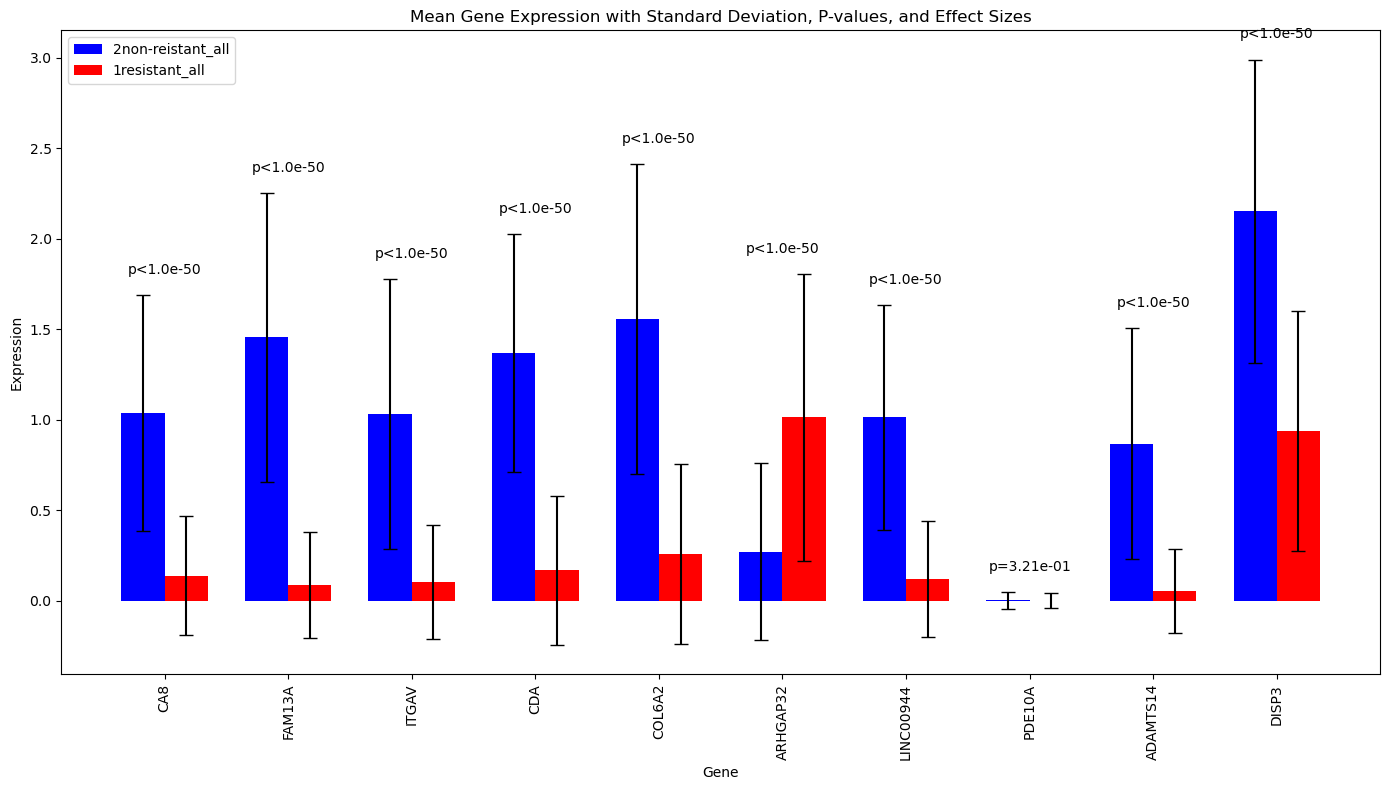

In [106]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats
from scipy.stats import t as t_dist

# Assuming you have your AnnData object 'adata'
# Step 1: Calculate the mean and standard deviation for each gene in each cluster
unique_clusters = adata.obs['compare_clusters'].unique()

# Initialize DataFrames to store the mean, standard deviation, and cell counts
mean_expression = pd.DataFrame(index=adata.var_names)
std_expression = pd.DataFrame(index=adata.var_names)
cell_counts = {}

# Calculate the mean and standard deviation for each cluster
for cluster in unique_clusters:
    # Select cells belonging to the current cluster
    cluster_cells = adata[adata.obs['compare_clusters'] == cluster]
    
    # Convert sparse matrix to dense
    dense_matrix = cluster_cells.X.toarray()
    
    # Calculate the mean expression for the current cluster
    mean_expression[cluster] = dense_matrix.mean(axis=0)
    
    # Calculate the standard deviation for the current cluster
    std_expression[cluster] = dense_matrix.std(axis=0)
    
    # Store the number of cells in the current cluster
    cell_counts[cluster] = dense_matrix.shape[0]

# Step 2: Combine the mean and standard deviation into a single DataFrame
combined_expression = pd.concat([mean_expression, std_expression], axis=1, keys=['Mean', 'Std'])

# Step 3: Filter genes of interest
# List of gene symbols to filter
gene_symbols = [
     "ARHGAP32",
    "ITGAV",
    "ADAMTS14",
    "ARHGEF2",
    "CDA",
    "FAM13A",
    "COL6A2",
    "PDE10A",
    "LINC00944",
    "CA8",
    "DISP3"
]

# Filter the combined DataFrame using the gene symbols
filtered_combined_expression = combined_expression.loc[combined_expression.index.intersection(gene_symbols)]

# Add cell counts as columns
for cluster in unique_clusters:
    filtered_combined_expression[f'Cell_Count_{cluster}'] = cell_counts[cluster]

# Extract the first ten rows (already have 11 here)
filtered_combined_expression = filtered_combined_expression.head(10)

# Convert to dictionary format
data = {
    'Gene': filtered_combined_expression.index.tolist(),
    'Mean_2non_reistant_all': filtered_combined_expression[('Mean', '2non-reistant_all')].tolist(),
    'Mean_1resistant_all': filtered_combined_expression[('Mean', '1resistant_all')].tolist(),
    'Std_2non_reistant_all': filtered_combined_expression[('Std', '2non-reistant_all')].tolist(),
    'Std_1resistant_all': filtered_combined_expression[('Std', '1resistant_all')].tolist(),
    'Cell_Count_2non_reistant_all': filtered_combined_expression['Cell_Count_2non-reistant_all'].tolist(),
    'Cell_Count_1resistant_all': filtered_combined_expression['Cell_Count_1resistant_all'].tolist()
}

# Convert the dictionary back to a DataFrame
df = pd.DataFrame(data)
df.set_index('Gene', inplace=True)

# Perform t-tests and calculate effect sizes
results = []
for gene in df.index:
    mean1 = df.loc[gene, 'Mean_2non_reistant_all']
    std1 = df.loc[gene, 'Std_2non_reistant_all']
    mean2 = df.loc[gene, 'Mean_1resistant_all']
    std2 = df.loc[gene, 'Std_1resistant_all']
    n1 = df.loc[gene, 'Cell_Count_2non_reistant_all']
    n2 = df.loc[gene, 'Cell_Count_1resistant_all']
    
    # Calculate t-test
    t_stat, p_value = ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False)
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    cohen_d = (mean1 - mean2) / pooled_std
    
    # Calculate confidence interval for the mean difference
    se_diff = np.sqrt(std1**2/n1 + std2**2/n2)
    mean_diff = mean1 - mean2
    df_diff = n1 + n2 - 2
    confidence_interval = t_dist.interval(0.95, df_diff, loc=mean_diff, scale=se_diff)
    
    results.append((gene, t_stat, p_value, cohen_d, confidence_interval))

# Create a DataFrame with the t-test results
ttest_results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'P-value', 'Cohen\'s d', '95% CI'])
ttest_results_df.set_index('Gene', inplace=True)

# Define a threshold for displaying p-values in scientific notation
p_value_threshold = 1e-50

# Plot the mean values with standard deviations and annotate with p-values
plt.figure(figsize=(14, 8))

bar_width = 0.35
genes = df.index
index = range(len(genes))

# Bar plots for the two conditions
bar1 = plt.bar(index, df['Mean_2non_reistant_all'], bar_width, yerr=df['Std_2non_reistant_all'], label='2non-reistant_all', capsize=5, color='blue')
bar2 = plt.bar([i + bar_width for i in index], df['Mean_1resistant_all'], bar_width, yerr=df['Std_1resistant_all'], label='1resistant_all', capsize=5, color='red')

# Annotate p-values
for i, gene in enumerate(genes):
    p_value = ttest_results_df.loc[gene, 'P-value']
    if p_value < p_value_threshold:
        p_value_str = f'p<{p_value_threshold:.1e}'
    else:
        p_value_str = f'p={p_value:.2e}'
    plt.text(i + bar_width / 2, max(df.loc[gene, 'Mean_2non_reistant_all'] + df.loc[gene, 'Std_2non_reistant_all'], df.loc[gene, 'Mean_1resistant_all'] + df.loc[gene, 'Std_1resistant_all']) + 0.1, p_value_str, ha='center', va='bottom')

plt.xlabel('Gene')
plt.ylabel('Expression')
plt.title('Mean Gene Expression with Standard Deviation, P-values, and Effect Sizes')
plt.xticks([i + bar_width / 2 for i in index], genes, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
